<a href="https://colab.research.google.com/github/zbatzioutilburg/2ndThesisSubmission/blob/main/1stDataProcessingMethodologySecond_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Hyperparameter Optimization package - Keras Tuner**

In [ ]:
pip install -q -U keras-tuner

     |████████████████████████████████| 98 kB 2.6 MB/s 


**Install Portfolio Optimization package - PyPortfolioOpt**

In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 2.9 MB/s 
     |████████████████████████████████| 2.7 MB 8.7 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


**Import Libraries**

In [ ]:
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import keras_tuner as kt
import random
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from functools import reduce
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import pypfopt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

**Random Seed**

In [ ]:
random.seed(1)

**Import Financial Variables and Calculate Their Logarithmic Returns**

In [ ]:
NAESX = pd.read_csv('NAESX.csv', sep = ',', index_col = 0)
NAESX.index = pd.to_datetime(NAESX.index)
NAESX = NAESX.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
NAESX.columns = ['NAESX Adj. Close']
NAESX = np.log(NAESX['NAESX Adj. Close']) - np.log(NAESX['NAESX Adj. Close'].shift(1))

VBMFX = pd.read_csv('VBMFX.csv', sep = ',', index_col = 0)
VBMFX.index = pd.to_datetime(VBMFX.index)
VBMFX = VBMFX.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
VBMFX.columns = ['VBMFX Adj. Close']
VBMFX = np.log(VBMFX['VBMFX Adj. Close']) - np.log(VBMFX['VBMFX Adj. Close'].shift(1))

VEIEX = pd.read_csv('VEIEX.csv', sep = ',', index_col = 0)
VEIEX.index = pd.to_datetime(VEIEX.index)
VEIEX = VEIEX.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
VEIEX.columns = ['VEIEX Adj. Close']
VEIEX = np.log(VEIEX['VEIEX Adj. Close']) - np.log(VEIEX['VEIEX Adj. Close'].shift(1))

VFINX = pd.read_csv('VFINX.csv', sep = ',', index_col = 0)
VFINX.index = pd.to_datetime(VFINX.index)
VFINX = VFINX.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
VFINX.columns = ['VFINX Adj. Close']
VFINX = np.log(VFINX['VFINX Adj. Close']) - np.log(VFINX['VFINX Adj. Close'].shift(1))

VGSLX = pd.read_csv('VGSLX.csv', sep = ',', index_col = 0)
VGSLX.index = pd.to_datetime(VGSLX.index)
VGSLX = VGSLX.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
VGSLX.columns = ['VGSLX Adj. Close']
VGSLX = np.log(VGSLX['VGSLX Adj. Close']) - np.log(VGSLX['VGSLX Adj. Close'].shift(1))

VGTSX = pd.read_csv('VGTSX.csv', sep = ',', index_col = 0)
VGTSX.index = pd.to_datetime(VGTSX.index)
VGTSX = VGTSX.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
VGTSX.columns = ['VGTSX Adj. Close']
VGTSX = np.log(VGTSX['VGTSX Adj. Close']) - np.log(VGTSX['VGTSX Adj. Close'].shift(1))

**Import Macroeconomic Variables and remove NaN values**

In [ ]:
T5YIE = pd.read_csv('T5YIE.csv', sep = ',', index_col = 0)
T5YIE.index = pd.to_datetime(T5YIE.index)
T5YIE.T5YIE = T5YIE.T5YIE.replace('.', '')
T5YIE.T5YIE = pd.to_numeric(T5YIE.T5YIE, errors = 'coerce')

DTB3 = pd.read_csv('DTB3.csv', sep = ',', index_col = 0)
DTB3.index = pd.to_datetime(DTB3.index)
DTB3.DTB3 = DTB3.DTB3.replace('.', '')
DTB3.DTB3 = pd.to_numeric(DTB3.DTB3, errors = 'coerce')

DTWEXM = pd.read_csv('DTWEXM.csv', sep = ',', index_col = 0)
DTWEXM.index = pd.to_datetime(DTWEXM.index)
DTWEXM.DTWEXM = DTWEXM.DTWEXM.replace('.', '')
DTWEXM.DTWEXM = pd.to_numeric(DTWEXM.DTWEXM, errors = 'coerce')

USEPUINDXD = pd.read_csv('USEPUINDXD.csv', sep = ',', index_col = 0)
USEPUINDXD.index = pd.to_datetime(USEPUINDXD.index)
USEPUINDXD.USEPUINDXD = USEPUINDXD.USEPUINDXD.replace('.', '')
USEPUINDXD.USEPUINDXD = pd.to_numeric(USEPUINDXD.USEPUINDXD, errors = 'coerce')

DCOILWTICO = pd.read_csv('DCOILWTICO.csv', sep = ',', index_col = 0)
DCOILWTICO.index = pd.to_datetime(DCOILWTICO.index)
DCOILWTICO.DCOILWTICO = DCOILWTICO.DCOILWTICO.replace('.', '')
DCOILWTICO.DCOILWTICO = pd.to_numeric(DCOILWTICO.DCOILWTICO, errors = 'coerce')

USD1MTD156N = pd.read_csv('USD1MTD156N.csv', sep = ',', index_col = 0)
USD1MTD156N.index = pd.to_datetime(USD1MTD156N.index)
USD1MTD156N.USD1MTD156N = USD1MTD156N.USD1MTD156N.replace('.', '')
USD1MTD156N.USD1MTD156N = pd.to_numeric(USD1MTD156N.USD1MTD156N, errors = 'coerce')

USEPUINDXD = USEPUINDXD.dropna(axis = 0)
USD1MTD156N = USD1MTD156N.dropna(axis = 0)
DTWEXM =  DTWEXM.dropna(axis = 0)
T5YIE = T5YIE.dropna(axis = 0)
DTB3 = DTB3.dropna(axis = 0)
DCOILWTICO = DCOILWTICO.dropna(axis = 0)

**Calculate the Logarithmic Returns of Macroeconomic Variables**

In [ ]:
USEPUINDXD.USEPUINDXD = np.log(USEPUINDXD.USEPUINDXD) - np.log(USEPUINDXD.USEPUINDXD.shift(1))
USD1MTD156N.USD1MTD156N = np.log(USD1MTD156N.USD1MTD156N) - np.log(USD1MTD156N.USD1MTD156N.shift(1))
DTWEXM.DTWEXM = np.log(DTWEXM.DTWEXM) - np.log(DTWEXM.DTWEXM.shift(1))
T5YIE.T5YIE = np.log(T5YIE.T5YIE) - np.log(T5YIE.T5YIE.shift(1))
DTB3.DTB3 = np.log(DTB3.DTB3) - np.log(DTB3.DTB3.shift(1))
DCOILWTICO.DCOILWTICO = np.log(DCOILWTICO.DCOILWTICO) - np.log(DCOILWTICO.DCOILWTICO.shift(1))

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


**Merge Macroeconomic Variables Into One Dataframe**

In [ ]:
macro = [USEPUINDXD, USD1MTD156N, DTWEXM, T5YIE, DTB3, DCOILWTICO]
X = reduce(lambda left, right : pd.merge(left, right,
                                         left_index = True, right_index = True,
                                         how = 'outer'), macro)
X = X['2003-01-03' : '2019-12-30']
X

,USEPUINDXD,USD1MTD156N,DTWEXM,T5YIE,DTB3,DCOILWTICO
DATE,,,,,,
2003-01-03,0.096997,0.000000,-0.004300,-0.015504,0.000000,0.039558
2003-01-04,-0.641239,NaN,NaN,NaN,NaN,NaN
2003-01-05,0.748111,NaN,NaN,NaN,NaN,NaN
2003-01-06,-0.874570,0.000000,-0.005051,0.023167,-0.008368,-0.029598
2003-01-07,0.080960,-0.000906,0.003619,-0.023167,-0.016950,-0.034339
...,...,...,...,...,...,...
2019-12-26,0.900240,NaN,-0.001394,-0.006006,0.000000,0.008951
2019-12-27,0.179324,-0.002980,-0.005062,-0.012121,-0.006473,0.000648
2019-12-28,-0.038408,NaN,NaN,NaN,NaN,NaN


**Replace Infinite Values With NaN and Replace All NaN Values From the Dataframe**

In [ ]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.dropna(axis = 0, how = 'any')

In [ ]:
X

,USEPUINDXD,USD1MTD156N,DTWEXM,T5YIE,DTB3,DCOILWTICO
DATE,,,,,,
2003-01-03,0.096997,0.000000,-0.004300,-0.015504,0.000000,0.039558
2003-01-06,-0.874570,0.000000,-0.005051,0.023167,-0.008368,-0.029598
2003-01-07,0.080960,-0.000906,0.003619,-0.023167,-0.016950,-0.034339
2003-01-08,0.129503,0.000000,-0.001881,0.038319,0.000000,-0.017459
2003-01-09,-0.570879,-0.002724,-0.001578,0.058411,0.008511,0.041213
...,...,...,...,...,...,...
2019-12-20,0.696262,-0.002945,0.003329,-0.005970,0.006473,-0.014294
2019-12-23,-0.539042,0.006786,0.000031,0.000000,0.006431,0.001323
2019-12-24,-0.133184,0.007090,-0.000269,0.000000,-0.006431,0.010848


**Create Target Variables**

In [ ]:
y1 = NAESX[NAESX.index.isin(X.index)]
y2 = VBMFX[VBMFX.index.isin(X.index)]
y3 = VEIEX[VEIEX.index.isin(X.index)]
y4 = VFINX[VFINX.index.isin(X.index)]
y5 = VGSLX[VGSLX.index.isin(X.index)]
y6 = VGTSX[VGTSX.index.isin(X.index)]

**Split Into Training, Validation and Testing Sets with an analogy of 70%-15%-15%**

In [ ]:
X_train = X[0 : int(0.7*len(X))]
X_val = X[int(0.7*len(X)) : int(0.85*len(X))]
X_test = X[int(0.85*len(X)) : ]

y1_train = y1[0: int(0.7*len(y1))]
y1_val = y1[int(0.7*len(y1)) : int(0.85*len(y1))]
y1_test = y1[int(0.85*len(y1)) : ]

y2_train = y2[0: int(0.7*len(y2))]
y2_val = y2[int(0.7*len(y2)) : int(0.85*len(y2))]
y2_test = y2[int(0.85*len(y2)) : ]

y3_train = y1[0: int(0.7*len(y3))]
y3_val = y3[int(0.7*len(y3)) : int(0.85*len(y3))]
y3_test = y3[int(0.85*len(y3)) : ]

y4_train = y4[0: int(0.7*len(y4))]
y4_val = y4[int(0.7*len(y4)) : int(0.85*len(y4))]
y4_test = y4[int(0.85*len(y4)) : ]

y5_train = y5[0: int(0.7*len(y5))]
y5_val = y5[int(0.7*len(y5)) : int(0.85*len(y5))]
y5_test = y5[int(0.85*len(y5)) : ]

y6_train = y6[0: int(0.7*len(y6))]
y6_val = y6[int(0.7*len(y6)) : int(0.85*len(y6))]
y6_test = y6[int(0.85*len(y6)) : ]

In [ ]:
plot_index = X.index
plot_index

DatetimeIndex(['2003-01-03', '2003-01-06', '2003-01-07', '2003-01-08',
               '2003-01-09', '2003-01-10', '2003-01-13', '2003-01-14',
               '2003-01-15', '2003-01-16',
               ...
               '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18',
               '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='DATE', length=4043, freq=None)

In [ ]:
X.describe()

,USEPUINDXD,USD1MTD156N,DTWEXM,T5YIE,DTB3,DCOILWTICO
count,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000
mean,-0.057065,0.000643,-0.000017,0.000672,-0.002260,0.000260
std,0.542780,0.009137,0.004450,0.040146,0.191872,0.022658
min,-3.148325,-0.111304,-0.041066,-0.854415,-3.332205,-0.151909
25%,-0.379266,-0.001379,-0.002581,-0.011451,-0.009302,-0.012115
50%,-0.060607,0.000000,0.000022,0.000000,0.000000,0.000859
75%,0.278081,0.002516,0.002494,0.011236,0.008584,0.012643
max,3.032457,0.160421,0.024859,0.810930,2.036882,0.164137


In [ ]:
y1_test.describe()

count    607.000000
mean       0.000342
std        0.009101
min       -0.039093
25%       -0.003925
50%        0.001081
75%        0.005748
max        0.034653
Name: NAESX Adj. Close, dtype: float64

In [ ]:
y2_test.describe()

count    607.000000
mean       0.000160
std        0.001957
min       -0.006355
25%       -0.000958
50%        0.000000
75%        0.001289
max        0.007293
Name: VBMFX Adj. Close, dtype: float64

In [ ]:
y3_test.describe()

count    607.000000
mean       0.000301
std        0.008631
min       -0.033795
25%       -0.004139
50%        0.001217
75%        0.005812
max        0.029335
Name: VEIEX Adj. Close, dtype: float64

In [ ]:
y4_test.describe()

count    607.000000
mean       0.000537
std        0.008380
min       -0.041920
25%       -0.002514
50%        0.000934
75%        0.004825
max        0.033795
Name: VFINX Adj. Close, dtype: float64

In [ ]:
y5_test.describe()

count    607.000000
mean       0.000318
std        0.008372
min       -0.038258
25%       -0.003960
50%        0.000975
75%        0.005706
max        0.025820
Name: VGSLX Adj. Close, dtype: float64

In [ ]:
y6_test.describe()

count    607.000000
mean       0.000264
std        0.007037
min       -0.035035
25%       -0.003296
50%        0.000627
75%        0.004565
max        0.028949
Name: VGTSX Adj. Close, dtype: float64

**Convert to Numpy Arrays**

In [ ]:
X_train = X_train.values
X_val = X_val.values
X_test = X_test.values

y1_train = y1_train.values
y1_val = y1_val.values
y1_test = y1_test.values

y2_train = y2_train.values
y2_val = y2_val.values
y2_test = y2_test.values

y3_train = y3_train.values
y3_val = y3_val.values
y3_test = y3_test.values

y4_train = y4_train.values
y4_val = y4_val.values
y4_test = y4_test.values

y5_train = y5_train.values
y5_val = y5_val.values
y5_test = y5_test.values

y6_train = y6_train.values
y6_val = y6_val.values
y6_test = y6_test.values

**Reshape the target arrays**

In [ ]:
y1_train = y1_train.reshape(len(y1_train), 1)
y1_val = y1_val.reshape(len(y1_val), 1)
y1_test = y1_test.reshape(len(y1_test), 1)

y2_train = y2_train.reshape(len(y2_train), 1)
y2_val = y2_val.reshape(len(y2_val), 1)
y2_test = y2_test.reshape(len(y2_test), 1)

y3_train = y3_train.reshape(len(y3_train), 1)
y3_val = y3_val.reshape(len(y3_val), 1)
y3_test = y3_test.reshape(len(y3_test), 1)

y4_train = y4_train.reshape(len(y4_train), 1)
y4_val = y4_val.reshape(len(y4_val), 1)
y4_test = y4_test.reshape(len(y4_test), 1)

y5_train = y5_train.reshape(len(y5_train), 1)
y5_val = y5_val.reshape(len(y5_val), 1)
y5_test = y5_test.reshape(len(y5_test), 1)

y6_train = y6_train.reshape(len(y6_train), 1)
y6_val = y6_val.reshape(len(y6_val), 1)
y6_test = y6_test.reshape(len(y6_test), 1)

**Data Standardization**

In [ ]:
X_train = (X_train - X_train.mean()) / X_train.std()
X_val = (X_val - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()

**Linear Regression Models - Baseline Models**

**Fit Linear Regression Models**

In [ ]:
baseline_1 = LinearRegression().fit(X_train, y1_train)
baseline_2 = LinearRegression().fit(X_train, y2_train)
baseline_3 = LinearRegression().fit(X_train, y3_train)
baseline_4 = LinearRegression().fit(X_train, y4_train)
baseline_5 = LinearRegression().fit(X_train, y5_train)
baseline_6 = LinearRegression().fit(X_train, y6_train)

baseline_y1_pred = baseline_1.predict(X_test)
baseline_y2_pred = baseline_2.predict(X_test)
baseline_y3_pred = baseline_3.predict(X_test)
baseline_y4_pred = baseline_4.predict(X_test)
baseline_y5_pred = baseline_5.predict(X_test)
baseline_y6_pred = baseline_6.predict(X_test)

baseline_1_r2_score = r2_score(y1_test, baseline_y1_pred)
baseline_2_r2_score = r2_score(y2_test, baseline_y2_pred)
baseline_3_r2_score = r2_score(y3_test, baseline_y3_pred)
baseline_4_r2_score = r2_score(y4_test, baseline_y4_pred)
baseline_5_r2_score = r2_score(y5_test, baseline_y5_pred)
baseline_6_r2_score = r2_score(y6_test, baseline_y6_pred)

baseline_1_rmse_score = np.sqrt(mean_squared_error(y1_test, baseline_y1_pred))
baseline_2_rmse_score = np.sqrt(mean_squared_error(y2_test, baseline_y2_pred))
baseline_3_rmse_score = np.sqrt(mean_squared_error(y3_test, baseline_y3_pred))
baseline_4_rmse_score = np.sqrt(mean_squared_error(y4_test, baseline_y4_pred))
baseline_5_rmse_score = np.sqrt(mean_squared_error(y5_test, baseline_y5_pred))
baseline_6_rmse_score = np.sqrt(mean_squared_error(y6_test, baseline_y6_pred))

print('R-squared - baseline 1: ' + str(baseline_1_r2_score))
print('R-squared - baseline 2: ' + str(baseline_2_r2_score))
print('R-squared - baseline 3: ' + str(baseline_3_r2_score))
print('R-squared - baseline 4: ' + str(baseline_4_r2_score))
print('R-squared - baseline 5: ' + str(baseline_5_r2_score))
print('R-squared - baseline 6: ' + str(baseline_6_r2_score))
print()
print('RMSE - baseline 1: ' + str(baseline_1_rmse_score))
print('RMSE - baseline 2: ' + str(baseline_2_rmse_score))
print('RMSE - baseline 3: ' + str(baseline_3_rmse_score))
print('RMSE - baseline 4: ' + str(baseline_4_rmse_score))
print('RMSE - baseline 5: ' + str(baseline_5_rmse_score))
print('RMSE - baseline 6: ' + str(baseline_6_rmse_score))

R-squared - baseline 1: -0.014287088978137463
R-squared - baseline 2: -0.2529537354454354
R-squared - baseline 3: -0.011571858624571663
R-squared - baseline 4: 0.015235806021016485
R-squared - baseline 5: -0.07535367273239713
R-squared - baseline 6: -0.6351533268865195

RMSE - baseline 1: 0.009158212948302165
RMSE - baseline 2: 0.0021885793564317313
RMSE - baseline 3: 0.008674070113608398
RMSE - baseline 4: 0.00830935503788832
RMSE - baseline 5: 0.008674213718594875
RMSE - baseline 6: 0.008991169033861048


**K Nearest Neighbors Models**

**Search for Optimal Number of Nearest Neighbors**

In [ ]:
# KNN 1
RMSE_values_1 = []
for K in range(200):
  K = K + 1
  knn_1 = KNeighborsRegressor(n_neighbors = K).fit(X_train, y1_train)
  knn_y1_pred = knn_1.predict(X_test)
  knn_1_rmse_score = np.sqrt(mean_squared_error(y1_test, knn_y1_pred))
  RMSE_values_1.append(knn_1_rmse_score)
knn_1_min_rmse = min(RMSE_values_1)
print('Optimal K for KNN 1 is: ' + str(RMSE_values_1.index(knn_1_min_rmse) + 1))

# KNN 2
RMSE_values_2 = []
for K in range(200):
  K = K + 1
  knn_2 = KNeighborsRegressor(n_neighbors = K).fit(X_train, y2_train)
  knn_y2_pred = knn_2.predict(X_test)
  knn_2_rmse_score = np.sqrt(mean_squared_error(y2_test, knn_y2_pred))
  RMSE_values_2.append(knn_2_rmse_score)
knn_2_min_rmse = min(RMSE_values_2)
print('Optimal K for KNN 2 is: ' + str(RMSE_values_2.index(knn_2_min_rmse) + 1))

# KNN 3
RMSE_values_3 = []
for K in range(200):
  K = K + 1
  knn_3 = KNeighborsRegressor(n_neighbors = K).fit(X_train, y3_train)
  knn_y3_pred = knn_3.predict(X_test)
  knn_3_rmse_score = np.sqrt(mean_squared_error(y3_test, knn_y3_pred))
  RMSE_values_3.append(knn_3_rmse_score)
knn_3_min_rmse = min(RMSE_values_3)
print('Optimal K for KNN 3 is: ' + str(RMSE_values_3.index(knn_3_min_rmse) + 1))

# KNN 4
RMSE_values_4 = []
for K in range(200):
  K = K + 1
  knn_4 = KNeighborsRegressor(n_neighbors = K).fit(X_train, y4_train)
  knn_y4_pred = knn_4.predict(X_test)
  knn_4_rmse_score = np.sqrt(mean_squared_error(y4_test, knn_y4_pred))
  RMSE_values_4.append(knn_4_rmse_score)
knn_4_min_rmse = min(RMSE_values_4)
print('Optimal K for KNN 4 is: ' + str(RMSE_values_4.index(knn_4_min_rmse) + 1))

# KNN 5
RMSE_values_5 = []
for K in range(200):
  K = K + 1
  knn_5 = KNeighborsRegressor(n_neighbors = K).fit(X_train, y5_train)
  knn_y5_pred = knn_5.predict(X_test)
  knn_5_rmse_score = np.sqrt(mean_squared_error(y5_test, knn_y5_pred))
  RMSE_values_5.append(knn_5_rmse_score)
knn_5_min_rmse = min(RMSE_values_5)
print('Optimal K for KNN 5 is: ' + str(RMSE_values_5.index(knn_5_min_rmse) + 1))

# KNN 6
RMSE_values_6 = []
for K in range(200):
  K = K + 1
  knn_6 = KNeighborsRegressor(n_neighbors = K).fit(X_train, y6_train)
  knn_y6_pred = knn_6.predict(X_test)
  knn_6_rmse_score = np.sqrt(mean_squared_error(y6_test, knn_y6_pred))
  RMSE_values_6.append(knn_6_rmse_score)
knn_6_min_rmse = min(RMSE_values_6)
print('Optimal K for KNN 6 is: ' + str(RMSE_values_6.index(knn_6_min_rmse) + 1))

Optimal K for KNN 1 is: 187
Optimal K for KNN 2 is: 181
Optimal K for KNN 3 is: 187
Optimal K for KNN 4 is: 191
Optimal K for KNN 5 is: 176
Optimal K for KNN 6 is: 185


**Fit KNN Models with Their Respective Optimal Hyperparameter**

In [ ]:
# KNN 1
knn_1 = KNeighborsRegressor(n_neighbors = 187).fit(X_train, y1_train)
knn_y1_pred = knn_1.predict(X_test)
knn_1_r2_score = r2_score(y1_test, knn_y1_pred)
knn_1_rmse_score = np.sqrt(mean_squared_error(y1_test, knn_y1_pred))
print('R-squared - KNN 1: ' + str(knn_1_r2_score))
print('RMSE - KNN 1: ' + str(knn_1_rmse_score))
print()

# KNN 2
knn_2 = KNeighborsRegressor(n_neighbors = 181).fit(X_train, y2_train)
knn_y2_pred = knn_2.predict(X_test)
knn_2_r2_score = r2_score(y2_test, knn_y2_pred)
knn_2_rmse_score = np.sqrt(mean_squared_error(y2_test, knn_y2_pred))
print('R-squared - KNN 2: ' + str(knn_2_r2_score))
print('RMSE - KNN 2: ' + str(knn_2_rmse_score))
print()

# KNN 3
knn_3 = KNeighborsRegressor(n_neighbors = 187).fit(X_train, y3_train)
knn_y3_pred = knn_3.predict(X_test)
knn_3_r2_score = r2_score(y3_test, knn_y3_pred)
knn_3_rmse_score = np.sqrt(mean_squared_error(y3_test, knn_y3_pred))
print('R-squared - KNN 3: ' + str(knn_3_r2_score))
print('RMSE - KNN 3: ' + str(knn_3_rmse_score))
print()

# KNN 4
knn_4 = KNeighborsRegressor(n_neighbors = 191).fit(X_train, y4_train)
knn_y4_pred = knn_4.predict(X_test)
knn_4_r2_score = r2_score(y4_test, knn_y4_pred)
knn_4_rmse_score = np.sqrt(mean_squared_error(y4_test, knn_y4_pred))
print('R-squared - KNN 4: ' + str(knn_4_r2_score))
print('RMSE - KNN 4: ' + str(knn_4_rmse_score))
print()

# KNN 5
knn_5 = KNeighborsRegressor(n_neighbors = 176).fit(X_train, y5_train)
knn_y5_pred = knn_5.predict(X_test)
knn_5_r2_score = r2_score(y5_test, knn_y5_pred)
knn_5_rmse_score = np.sqrt(mean_squared_error(y5_test, knn_y5_pred))
print('R-squared - KNN 5: ' + str(knn_5_r2_score))
print('RMSE - KNN 5: ' + str(knn_5_rmse_score))
print()

# KNN 6
knn_6 = KNeighborsRegressor(n_neighbors = 185).fit(X_train, y6_train)
knn_y6_pred = knn_6.predict(X_test)
knn_6_r2_score = r2_score(y6_test, knn_y6_pred)
knn_6_rmse_score = np.sqrt(mean_squared_error(y6_test, knn_y6_pred))
print('R-squared - KNN 6: ' + str(knn_6_r2_score))
print('RMSE - KNN 6: ' + str(knn_6_rmse_score))

R-squared - KNN 1: 0.011644534580985577
RMSE - KNN 1: 0.009040383896669097

R-squared - KNN 2: 0.008099863428853493
RMSE - KNN 2: 0.0019472815806578486

R-squared - KNN 3: 0.017801860220886367
RMSE - KNN 3: 0.008547204842924297

R-squared - KNN 4: 0.009540181966494421
RMSE - KNN 4: 0.008333349984162918

R-squared - KNN 5: -0.01260652306134813
RMSE - KNN 5: 0.008417338979631301

R-squared - KNN 6: 0.01081691985991784
RMSE - KNN 6: 0.006993188921782712


**Multilayer Perceptron (MLP) Models**

**NAESX MLP**

**Create MLP Model with the Use of a Function**

In [ ]:
def mlp_builder(hp):
  hp_units = hp.Int('units', min_value = 50, max_value = 500, step = 50)
  hp_learning_rate = hp.Choice('learning_rate',
                               values = [1e-1, 1e-2, 1e-3, 1e-4])
  hp_activation = hp.Choice('activation',
                            values = ['relu', 'tanh', 'sigmoid'])
  model = tf.keras.Sequential()
  model.add((keras.layers.Dense(units = hp_units,
                                     activation = hp_activation,
                                     input_dim = X_train.shape[1])))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))
  model.add(keras.layers.Dense(y1_train.shape[1]))

  model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                loss = 'mse',
                metrics = tf.keras.metrics.RootMeanSquaredError())
  return model

**Instantiate the Tuner and Perform Hyperparameter Tuning**

In [ ]:
tuner = kt.Hyperband(mlp_builder,
                     objective = 'val_loss',
                     max_epochs = 100,
                     directory = 'keras_tuner_dir',
                     project_name = 'keras_mlp',
                     overwrite = True)

**Early Stopping Definition**

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)

**Hyperparameters' Search for 50 Epochs**

In [ ]:
tuner.search(X_train, y1_train,
             epochs = 100, validation_data = (X_val, y1_val),
             callbacks = [stop_early])

Trial 151 Complete [00h 00m 11s]
val_loss: 0.00014218284923117608

Best val_loss So Far: 8.252679253928363e-05
Total elapsed time: 00h 08m 46s
INFO:tensorflow:Oracle triggered exit


**Get the Optimal Hyperparameters**

In [ ]:
best_hps_mlp_1=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print(f"""
The hyperparameter search for NAESX MLP is complete.
The optimal number of units in the first hidden
layer is {best_hps_mlp_1.get('units')},
the optimal activation function is {best_hps_mlp_1.get('activation')}
and the optimal learning rate for the optimizer
is {best_hps_mlp_1.get('learning_rate')}.
""")


The hyperparameter search for NAESX MLP is complete.
The optimal number of units in the first hidden
layer is 250,
the optimal activation function is relu
and the optimal learning rate for the optimizer
is 0.0001.



**Find the optimal number of epochs to train the model with the hyperparameters obtained from the search. Build the model with the optimal hyperparameters
and train it on the data for 50 epochs**

In [ ]:
model_mlp_1 = tuner.hypermodel.build(best_hps_mlp_1)

history = model_mlp_1.fit(X_train, y1_train,
                    epochs = 100, validation_data = (X_val, y1_val))

val_rmse_per_epoch = history.history['val_root_mean_squared_error']

best_epoch = val_rmse_per_epoch.index(min(val_rmse_per_epoch))

print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
89/89 [==============================] - 1s 8ms/step - loss: 3.1396e-04 - root_mean_squared_error: 0.0177 - val_loss: 9.5977e-05 - val_root_mean_squared_error: 0.0098
Epoch 2/100
89/89 [==============================] - 1s 6ms/step - loss: 1.9087e-04 - root_mean_squared_error: 0.0138 - val_loss: 8.5687e-05 - val_root_mean_squared_error: 0.0093
Epoch 3/100
89/89 [==============================] - 1s 6ms/step - loss: 2.0944e-04 - root_mean_squared_error: 0.0145 - val_loss: 8.9211e-05 - val_root_mean_squared_error: 0.0094
Epoch 4/100
89/89 [==============================] - 1s 6ms/step - loss: 1.7919e-04 - root_mean_squared_error: 0.0134 - val_loss: 8.5591e-05 - val_root_mean_squared_error: 0.0093
Epoch 5/100
89/89 [==============================] - 1s 6ms/step - loss: 2.1424e-04 - root_mean_squared_error: 0.0146 - val_loss: 8.2895e-05 - val_root_mean_squared_error: 0.0091
Epoch 6/100
89/89 [==============================] - 1s 6ms/step - loss: 1.9222e-04 - root_mean_squared_e

**Pass the Οptimal Ηyperparameters to Ηypermodel and Retrain the Model with the Optimal Number of Epochs**

---



In [ ]:
hypermodel_mlp_1 = tuner.hypermodel.build(best_hps_mlp_1)
hypermodel_mlp_1.fit(X_train, y1_train,
               epochs=best_epoch,
               validation_data = (X_val, y1_val),
               shuffle = False)

Epoch 1/8
89/89 [==============================] - 1s 7ms/step - loss: 3.4704e-04 - root_mean_squared_error: 0.0186 - val_loss: 9.8384e-05 - val_root_mean_squared_error: 0.0099
Epoch 2/8
89/89 [==============================] - 0s 5ms/step - loss: 2.0114e-04 - root_mean_squared_error: 0.0142 - val_loss: 9.1770e-05 - val_root_mean_squared_error: 0.0096
Epoch 3/8
89/89 [==============================] - 0s 5ms/step - loss: 1.9164e-04 - root_mean_squared_error: 0.0138 - val_loss: 8.3603e-05 - val_root_mean_squared_error: 0.0091
Epoch 4/8
89/89 [==============================] - 0s 5ms/step - loss: 1.7806e-04 - root_mean_squared_error: 0.0133 - val_loss: 8.7112e-05 - val_root_mean_squared_error: 0.0093
Epoch 5/8
89/89 [==============================] - 0s 5ms/step - loss: 2.1442e-04 - root_mean_squared_error: 0.0146 - val_loss: 8.8195e-05 - val_root_mean_squared_error: 0.0094
Epoch 6/8
89/89 [==============================] - 0s 5ms/step - loss: 2.1968e-04 - root_mean_squared_error: 0.0148

**Predicted NAESX**



In [ ]:
y1_pred = hypermodel_mlp_1.predict(X_test)

**Evaluate Hypermodel Using Test Set**

In [ ]:
### Evaluate hypermodel using test sets.
eval_result = hypermodel_mlp_1.evaluate(X_test, y1_test)
print("[test loss, test rmse]:", eval_result)

19/19 [==============================] - 0s 2ms/step - loss: 8.5224e-05 - root_mean_squared_error: 0.0092
[test loss, test rmse]: [8.522369898855686e-05, 0.009231667965650558]


In [ ]:
mlp_1_r2_score = r2_score(y1_test, y1_pred)
RMSE_mlp_1 = math.sqrt(np.square(np.subtract(y1_test, y1_pred)).mean())
print('NAESX - R-squared - MLP: ' + str(mlp_1_r2_score))
print('NAESX - RMSE - MLP: ' + str(RMSE_mlp_1))

NAESX - R-squared - MLP: -0.030622881139035663
NAESX - RMSE - MLP: 0.009231668032125703


**VBMFX - MLP**

**Create MLP Model with the Use of a Function**

In [ ]:
def mlp_builder(hp):
  hp_units = hp.Int('units', min_value = 50, max_value = 500, step = 50)
  hp_learning_rate = hp.Choice('learning_rate',
                               values = [1e-1, 1e-2, 1e-3, 1e-4])
  hp_activation = hp.Choice('activation',
                            values = ['relu', 'tanh', 'sigmoid'])
  model = tf.keras.Sequential()
  model.add((keras.layers.Dense(units = hp_units,
                                     activation = hp_activation,
                                     input_dim = X_train.shape[1])))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))
  model.add(keras.layers.Dense(y2_train.shape[1]))

  model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                loss = 'mse',
                metrics = tf.keras.metrics.RootMeanSquaredError())
  return model

**Instantiate the Tuner and Perform Hyperparameter Tuning**

In [ ]:
tuner = kt.Hyperband(mlp_builder,
                     objective = 'val_loss',
                     max_epochs = 100,
                     directory = 'keras_tuner_dir',
                     project_name = 'keras_mlp',
                     overwrite = True)

**Hyperparameters' Search for 50 Epochs**

In [ ]:
tuner.search(X_train, y2_train,
             epochs = 100, validation_data = (X_val, y2_val),
             callbacks = [stop_early])

Trial 152 Complete [00h 00m 03s]
val_loss: 5.79980996917584e-06

Best val_loss So Far: 5.050991148891626e-06
Total elapsed time: 00h 08m 22s
INFO:tensorflow:Oracle triggered exit


**Get the Optimal Hyperparameters**

In [ ]:
best_hps_mlp_2=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print(f"""
The hyperparameter search for VBMFX MLP is complete.
The optimal number of units in the first hidden
layer is {best_hps_mlp_2.get('units')},
the optimal activation function is {best_hps_mlp_2.get('activation')}
and the optimal learning rate for the optimizer
is {best_hps_mlp_2.get('learning_rate')}.
""")


The hyperparameter search for VBMFX MLP is complete.
The optimal number of units in the first hidden
layer is 350,
the optimal activation function is tanh
and the optimal learning rate for the optimizer
is 0.0001.



**Find the optimal number of epochs to train the model with the hyperparameters obtained from the search. Build the model with the optimal hyperparameters and train it on the data for 50 epochs**

In [ ]:
model = tuner.hypermodel.build(best_hps_mlp_2)

history = model.fit(X_train, y2_train,
                    epochs=100, validation_data = (X_val, y2_val))

val_rmse_per_epoch = history.history['val_root_mean_squared_error']

best_epoch = val_rmse_per_epoch.index(min(val_rmse_per_epoch))

print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
89/89 [==============================] - 1s 8ms/step - loss: 0.0035 - root_mean_squared_error: 0.0593 - val_loss: 1.6310e-05 - val_root_mean_squared_error: 0.0040
Epoch 2/100
89/89 [==============================] - 1s 7ms/step - loss: 2.3652e-05 - root_mean_squared_error: 0.0049 - val_loss: 8.1620e-06 - val_root_mean_squared_error: 0.0029
Epoch 3/100
89/89 [==============================] - 1s 7ms/step - loss: 1.2356e-05 - root_mean_squared_error: 0.0035 - val_loss: 5.7502e-06 - val_root_mean_squared_error: 0.0024
Epoch 4/100
89/89 [==============================] - 1s 7ms/step - loss: 2.3022e-05 - root_mean_squared_error: 0.0048 - val_loss: 6.6379e-06 - val_root_mean_squared_error: 0.0026
Epoch 5/100
89/89 [==============================] - 1s 6ms/step - loss: 1.0910e-05 - root_mean_squared_error: 0.0033 - val_loss: 5.5330e-06 - val_root_mean_squared_error: 0.0024
Epoch 6/100
89/89 [==============================] - 1s 7ms/step - loss: 1.0496e-05 - root_mean_squared_error

**Pass the Optimal Hyperparameters to Hypermodel and Retrain the Model with the Optimal Number of Epochs**

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps_mlp_2)
hypermodel.fit(X_train, y2_train,
               epochs=best_epoch,
               validation_data = (X_val, y2_val),
               shuffle = False)

Epoch 1/70
89/89 [==============================] - 1s 8ms/step - loss: 0.0026 - root_mean_squared_error: 0.0514 - val_loss: 1.9939e-04 - val_root_mean_squared_error: 0.0141
Epoch 2/70
89/89 [==============================] - 1s 7ms/step - loss: 0.0014 - root_mean_squared_error: 0.0376 - val_loss: 4.1437e-05 - val_root_mean_squared_error: 0.0064
Epoch 3/70
89/89 [==============================] - 1s 7ms/step - loss: 1.5243e-04 - root_mean_squared_error: 0.0123 - val_loss: 4.2820e-05 - val_root_mean_squared_error: 0.0065
Epoch 4/70
89/89 [==============================] - 1s 7ms/step - loss: 1.4500e-04 - root_mean_squared_error: 0.0120 - val_loss: 1.2076e-05 - val_root_mean_squared_error: 0.0035
Epoch 5/70
89/89 [==============================] - 1s 7ms/step - loss: 0.0010 - root_mean_squared_error: 0.0323 - val_loss: 4.2900e-05 - val_root_mean_squared_error: 0.0065
Epoch 6/70
89/89 [==============================] - 1s 7ms/step - loss: 6.9553e-04 - root_mean_squared_error: 0.0264 - val

**Predicted VBMFX**

In [ ]:
y2_pred = hypermodel.predict(X_test)

**Evaluate hypermodel using test set**

In [ ]:
eval_result = hypermodel.evaluate(X_test, y2_test)
print("[test loss, test rmse]:", eval_result)

19/19 [==============================] - 0s 4ms/step - loss: 5.2898e-06 - root_mean_squared_error: 0.0023
[test loss, test rmse]: [5.289772161631845e-06, 0.002299950458109379]


In [ ]:
mlp_2_r2_score = r2_score(y2_test, y2_pred)
RMSE = np.sqrt(mean_squared_error(y2_test, y2_pred))
print('VBMFX - R-squared - MLP: ' + str(mlp_2_r2_score))
print('VBMFX - RMSE - MLP: ' + str(RMSE))

VBMFX - R-squared - MLP: -0.3837174832696093
VBMFX - RMSE - MLP: 0.0022999505309595396


**VEIEX - MLP**

In [ ]:
def mlp_builder(hp):
  hp_units = hp.Int('units', min_value = 50, max_value = 500, step = 50)
  hp_learning_rate = hp.Choice('learning_rate',
                               values = [1e-1, 1e-2, 1e-3, 1e-4])
  hp_activation = hp.Choice('activation',
                            values = ['relu', 'tanh', 'sigmoid'])
  model = tf.keras.Sequential()
  model.add((keras.layers.Dense(units = hp_units,
                                     activation = hp_activation,
                                     input_dim = X_train.shape[1])))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))
  model.add(keras.layers.Dense(y3_train.shape[1]))

  model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                loss = 'mse',
                metrics = tf.keras.metrics.RootMeanSquaredError())
  return model

**Instantiate the Tuner and Perform Hyperparameter Tuning**

In [ ]:
tuner = kt.Hyperband(mlp_builder,
                     objective = 'val_loss',
                     max_epochs = 100,
                     directory = 'keras_tuner_dir',
                     project_name = 'keras_mlp',
                     overwrite = True)

**Hyperparameters' Search for 50 Epochs**

In [ ]:
tuner.search(X_train, y3_train,
             epochs = 100, validation_data = (X_val, y3_val),
             callbacks = [stop_early])

Trial 163 Complete [00h 00m 03s]
val_loss: 9.839922131504864e-05

Best val_loss So Far: 9.385100565850735e-05
Total elapsed time: 00h 10m 29s
INFO:tensorflow:Oracle triggered exit


**Get the Optimal Hyperparameters**

In [ ]:
best_hps_mlp_3=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print(f"""
The hyperparameter search for VEIEX MLP is complete.
The optimal number of units in the first hidden
layer is {best_hps_mlp_3.get('units')},
the optimal activation function is {best_hps_mlp_3.get('activation')}
and the optimal learning rate for the optimizer
is {best_hps_mlp_3.get('learning_rate')}.
""")


The hyperparameter search for VEIEX MLP is complete.
The optimal number of units in the first hidden
layer is 300,
the optimal activation function is tanh
and the optimal learning rate for the optimizer
is 0.001.



**Find the optimal number of epochs to train the model with the hyperparameters obtained from the search. Build the model with the optimal hyperparameters and train it on the data for 50 epochs**

In [ ]:
model = tuner.hypermodel.build(best_hps_mlp_3)

history = model.fit(X_train, y3_train,
                    epochs=100, validation_data = (X_val, y3_val))

val_rmse_per_epoch = history.history['val_root_mean_squared_error']

best_epoch = val_rmse_per_epoch.index(min(val_rmse_per_epoch))

print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
89/89 [==============================] - 1s 9ms/step - loss: 0.1162 - root_mean_squared_error: 0.3409 - val_loss: 1.0337e-04 - val_root_mean_squared_error: 0.0102
Epoch 2/100
89/89 [==============================] - 1s 8ms/step - loss: 1.9696e-04 - root_mean_squared_error: 0.0140 - val_loss: 9.9649e-05 - val_root_mean_squared_error: 0.0100
Epoch 3/100
89/89 [==============================] - 1s 8ms/step - loss: 1.8746e-04 - root_mean_squared_error: 0.0137 - val_loss: 1.0709e-04 - val_root_mean_squared_error: 0.0103
Epoch 4/100
89/89 [==============================] - 1s 8ms/step - loss: 1.9862e-04 - root_mean_squared_error: 0.0141 - val_loss: 1.0227e-04 - val_root_mean_squared_error: 0.0101
Epoch 5/100
89/89 [==============================] - 1s 7ms/step - loss: 2.1406e-04 - root_mean_squared_error: 0.0146 - val_loss: 1.2304e-04 - val_root_mean_squared_error: 0.0111
Epoch 6/100
89/89 [==============================] - 1s 8ms/step - loss: 1.8948e-04 - root_mean_squared_error

**Pass the Optimal Hyperparameters to Hypermodel and Retrain the Model with the Optimal Number of Epochs**

In [ ]:
### Pass the optimal hyperparameters to hypermodel.
hypermodel = tuner.hypermodel.build(best_hps_mlp_3)

### Retrain the model with the optimal number of epochs.
hypermodel.fit(X_train, y3_train,
               epochs=best_epoch,
               validation_data = (X_val, y3_val),
               shuffle = False)

Epoch 1/18
89/89 [==============================] - 1s 9ms/step - loss: 0.0803 - root_mean_squared_error: 0.2834 - val_loss: 1.2252e-04 - val_root_mean_squared_error: 0.0111
Epoch 2/18
89/89 [==============================] - 1s 7ms/step - loss: 7.1124e-04 - root_mean_squared_error: 0.0267 - val_loss: 1.0453e-04 - val_root_mean_squared_error: 0.0102
Epoch 3/18
89/89 [==============================] - 1s 7ms/step - loss: 2.5893e-04 - root_mean_squared_error: 0.0161 - val_loss: 9.8985e-05 - val_root_mean_squared_error: 0.0099
Epoch 4/18
89/89 [==============================] - 1s 8ms/step - loss: 2.1507e-04 - root_mean_squared_error: 0.0147 - val_loss: 9.3891e-05 - val_root_mean_squared_error: 0.0097
Epoch 5/18
89/89 [==============================] - 1s 7ms/step - loss: 2.1178e-04 - root_mean_squared_error: 0.0146 - val_loss: 9.2610e-05 - val_root_mean_squared_error: 0.0096
Epoch 6/18
89/89 [==============================] - 1s 7ms/step - loss: 2.0328e-04 - root_mean_squared_error: 0.01

**Predicted VEIEX**

In [ ]:
y3_pred = hypermodel.predict(X_test)

**Evaluate Hypermodel Using Test Set**

In [ ]:
eval_result = hypermodel.evaluate(X_test, y3_test)
print("[test loss, test rmse]:", eval_result)

19/19 [==============================] - 0s 2ms/step - loss: 8.1074e-05 - root_mean_squared_error: 0.0090
[test loss, test rmse]: [8.107411849778146e-05, 0.009004116989672184]


In [ ]:
mlp_3_r2_score = r2_score(y3_test, y3_pred)
RMSE_mlp_3 = np.sqrt(mean_squared_error(y3_test, y3_pred))
print('VEIEX - R-squared - MLP: ' + str(mlp_3_r2_score))
print('VEIEX - RMSE - MLP: ' + str(RMSE_mlp_3))

VEIEX - R-squared - MLP: -0.09001658889153408
VEIEX - RMSE - MLP: 0.009004116645775134


**VFINX - MLP**

In [ ]:
def mlp_builder(hp):
  hp_units = hp.Int('units', min_value = 50, max_value = 500, step = 50)
  hp_learning_rate = hp.Choice('learning_rate',
                               values = [1e-1, 1e-2, 1e-3, 1e-4])
  hp_activation = hp.Choice('activation',
                            values = ['relu', 'tanh', 'sigmoid'])
  model = tf.keras.Sequential()
  model.add((keras.layers.Dense(units = hp_units,
                                     activation = hp_activation,
                                     input_dim = X_train.shape[1])))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))
  model.add(keras.layers.Dense(y4_train.shape[1]))

  model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                loss = 'mse',
                metrics = tf.keras.metrics.RootMeanSquaredError())
  return model

**Instantiate the Tuner and Perform Hyperparameter Tuning**

In [ ]:
tuner = kt.Hyperband(mlp_builder,
                     objective = 'val_loss',
                     max_epochs = 100,
                     directory = 'keras_tuner_dir',
                     project_name = 'keras_mlp',
                     overwrite = True)

**Hyperparameters' Search for 50 Epochs**

In [ ]:
tuner.search(X_train, y4_train,
             epochs = 100, validation_data = (X_val, y4_val),
             callbacks = [stop_early])

Trial 154 Complete [00h 00m 03s]
val_loss: 7.361975440289825e-05

Best val_loss So Far: 6.146944360807538e-05
Total elapsed time: 00h 09m 19s
INFO:tensorflow:Oracle triggered exit


**Get the Optimal Hyperparameters**

In [ ]:
best_hps_mlp_4=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print(f"""
The hyperparameter search for VFINX MLP is complete.
The optimal number of units in the first hidden
layer is {best_hps_mlp_4.get('units')},
the optimal activation function is {best_hps_mlp_4.get('activation')}
and the optimal learning rate for the optimizer
is {best_hps_mlp_4.get('learning_rate')}.
""")


The hyperparameter search for VFINX MLP is complete.
The optimal number of units in the first hidden
layer is 150,
the optimal activation function is relu
and the optimal learning rate for the optimizer
is 0.001.



**Find the optimal number of epochs to train the model with the hyperparameters obtained from the search. Build the model with the optimal hyperparameters and train it on the data for 50 epochs**

In [ ]:
model = tuner.hypermodel.build(best_hps_mlp_4)

history = model.fit(X_train, y4_train,
                    epochs=100, validation_data = (X_val, y4_val))

val_rmse_per_epoch = history.history['val_root_mean_squared_error']

best_epoch = val_rmse_per_epoch.index(min(val_rmse_per_epoch))

print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
89/89 [==============================] - 1s 6ms/step - loss: 6.1912e-04 - root_mean_squared_error: 0.0249 - val_loss: 7.5269e-05 - val_root_mean_squared_error: 0.0087
Epoch 2/100
89/89 [==============================] - 0s 4ms/step - loss: 1.5620e-04 - root_mean_squared_error: 0.0125 - val_loss: 7.3752e-05 - val_root_mean_squared_error: 0.0086
Epoch 3/100
89/89 [==============================] - 0s 4ms/step - loss: 1.4526e-04 - root_mean_squared_error: 0.0121 - val_loss: 6.7692e-05 - val_root_mean_squared_error: 0.0082
Epoch 4/100
89/89 [==============================] - 0s 5ms/step - loss: 1.4551e-04 - root_mean_squared_error: 0.0121 - val_loss: 6.7955e-05 - val_root_mean_squared_error: 0.0082
Epoch 5/100
89/89 [==============================] - 0s 4ms/step - loss: 1.8839e-04 - root_mean_squared_error: 0.0137 - val_loss: 7.0558e-05 - val_root_mean_squared_error: 0.0084
Epoch 6/100
89/89 [==============================] - 0s 5ms/step - loss: 1.2921e-04 - root_mean_squared_e

**Pass the Optimal Hyperparameters to Hypermodel and Retrain the Model with the Optimal Number of Epochs**

In [ ]:
### Pass the optimal hyperparameters to hypermodel.
hypermodel = tuner.hypermodel.build(best_hps_mlp_4)

### Retrain the model with the optimal number of epochs.
hypermodel.fit(X_train, y4_train,
               epochs=best_epoch,
               validation_data = (X_val, y4_val),
               shuffle = False)

Epoch 1/9
89/89 [==============================] - 1s 6ms/step - loss: 5.1039e-04 - root_mean_squared_error: 0.0226 - val_loss: 1.1024e-04 - val_root_mean_squared_error: 0.0105
Epoch 2/9
89/89 [==============================] - 0s 4ms/step - loss: 3.8976e-04 - root_mean_squared_error: 0.0197 - val_loss: 7.0849e-05 - val_root_mean_squared_error: 0.0084
Epoch 3/9
89/89 [==============================] - 0s 4ms/step - loss: 2.1070e-04 - root_mean_squared_error: 0.0145 - val_loss: 7.0265e-05 - val_root_mean_squared_error: 0.0084
Epoch 4/9
89/89 [==============================] - 0s 4ms/step - loss: 1.4097e-04 - root_mean_squared_error: 0.0119 - val_loss: 8.6966e-05 - val_root_mean_squared_error: 0.0093
Epoch 5/9
89/89 [==============================] - 0s 5ms/step - loss: 1.1611e-04 - root_mean_squared_error: 0.0108 - val_loss: 6.4270e-05 - val_root_mean_squared_error: 0.0080
Epoch 6/9
89/89 [==============================] - 0s 5ms/step - loss: 1.1255e-04 - root_mean_squared_error: 0.0106

**Predicted VFINX**

In [ ]:
y4_pred = hypermodel.predict(X_test)

**Evaluate Hypermodel Using Test Set**

In [ ]:
eval_result = hypermodel.evaluate(X_test, y4_test)
print("[test loss, test rmse]:", eval_result)

19/19 [==============================] - 0s 2ms/step - loss: 6.8291e-05 - root_mean_squared_error: 0.0083
[test loss, test rmse]: [6.829067569924518e-05, 0.008263817057013512]


In [ ]:
mlp_4_r2_score = r2_score(y4_test, y4_pred)
RMSE_mlp_4 = np.sqrt(mean_squared_error(y4_test, y4_pred))
print('VFINX - R-squared - MLP: ' + str(mlp_4_r2_score))
print('VFINX - RMSE - MLP: ' + str(RMSE_mlp_4))

VFINX - R-squared - MLP: 0.02599975707103941
VFINX - RMSE - MLP: 0.008263817615770157


**VGSLX - MLP**

In [ ]:
def mlp_builder(hp):
  hp_units = hp.Int('units', min_value = 50, max_value = 500, step = 50)
  hp_learning_rate = hp.Choice('learning_rate',
                               values = [1e-1, 1e-2, 1e-3, 1e-4])
  hp_activation = hp.Choice('activation',
                            values = ['relu', 'tanh', 'sigmoid'])
  model = tf.keras.Sequential()
  model.add((keras.layers.Dense(units = hp_units,
                                     activation = hp_activation,
                                     input_dim = X_train.shape[1])))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))  
  model.add(keras.layers.Dense(y5_train.shape[1]))

  model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                loss = 'mse',
                metrics = tf.keras.metrics.RootMeanSquaredError())
  return model

**Instantiate the Tuner and Perform Hyperparameter Tuning**

In [ ]:
tuner = kt.Hyperband(mlp_builder,
                     objective = 'val_loss',
                     max_epochs = 100,
                     directory = 'keras_tuner_dir',
                     project_name = 'keras_mlp',
                     overwrite = True)

**Hyperparameters' Search for 50 Epochs**

In [ ]:
tuner.search(X_train, y5_train,
             epochs = 100, validation_data = (X_val, y5_val),
             callbacks = [stop_early])

Trial 154 Complete [00h 00m 03s]
val_loss: 0.0001454703597119078

Best val_loss So Far: 0.00010064385423902422
Total elapsed time: 00h 09m 43s
INFO:tensorflow:Oracle triggered exit


**Get the Optimal Hyperparameters**

In [ ]:
best_hps_mlp_5=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print(f"""
The hyperparameter search for VGSLX MLP is complete.
The optimal number of units in the first hidden
layer is {best_hps_mlp_5.get('units')},
the optimal activation function is {best_hps_mlp_5.get('activation')}
and the optimal learning rate for the optimizer
is {best_hps_mlp_5.get('learning_rate')}.
""")


The hyperparameter search for VGSLX MLP is complete.
The optimal number of units in the first hidden
layer is 100,
the optimal activation function is sigmoid
and the optimal learning rate for the optimizer
is 0.0001.



**Find the optimal number of epochs to train the model with the hyperparameters obtained from the search. Build the model with the optimal hyperparameters and train it on the data for 50 epochs**

In [ ]:
model = tuner.hypermodel.build(best_hps_mlp_5)

history = model.fit(X_train, y5_train,
                    epochs=100, validation_data = (X_val, y5_val))

val_rmse_per_epoch = history.history['val_root_mean_squared_error']

best_epoch = val_rmse_per_epoch.index(min(val_rmse_per_epoch))

print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
89/89 [==============================] - 1s 5ms/step - loss: 0.0057 - root_mean_squared_error: 0.0758 - val_loss: 1.0560e-04 - val_root_mean_squared_error: 0.0103
Epoch 2/100
89/89 [==============================] - 0s 4ms/step - loss: 3.4908e-04 - root_mean_squared_error: 0.0187 - val_loss: 1.0247e-04 - val_root_mean_squared_error: 0.0101
Epoch 3/100
89/89 [==============================] - 0s 4ms/step - loss: 3.4854e-04 - root_mean_squared_error: 0.0187 - val_loss: 1.0249e-04 - val_root_mean_squared_error: 0.0101
Epoch 4/100
89/89 [==============================] - 0s 4ms/step - loss: 3.5100e-04 - root_mean_squared_error: 0.0187 - val_loss: 1.0178e-04 - val_root_mean_squared_error: 0.0101
Epoch 5/100
89/89 [==============================] - 0s 4ms/step - loss: 3.4898e-04 - root_mean_squared_error: 0.0187 - val_loss: 1.2061e-04 - val_root_mean_squared_error: 0.0110
Epoch 6/100
89/89 [==============================] - 0s 4ms/step - loss: 3.5391e-04 - root_mean_squared_error

**Pass the Optimal Hyperparameters to Hypermodel and Retrain the Model with the Optimal Number of Epochs**

In [ ]:
### Pass the optimal hyperparameters to hypermodel.
hypermodel = tuner.hypermodel.build(best_hps_mlp_5)

### Retrain the model with the optimal number of epochs.
hypermodel.fit(X_train, y5_train,
               epochs=best_epoch,
               validation_data = (X_val, y5_val),
               shuffle = False)

Epoch 1/94
89/89 [==============================] - 1s 5ms/step - loss: 0.2353 - root_mean_squared_error: 0.4851 - val_loss: 3.9690e-04 - val_root_mean_squared_error: 0.0199
Epoch 2/94
89/89 [==============================] - 0s 4ms/step - loss: 3.8968e-04 - root_mean_squared_error: 0.0197 - val_loss: 1.0080e-04 - val_root_mean_squared_error: 0.0100
Epoch 3/94
89/89 [==============================] - 0s 4ms/step - loss: 3.5276e-04 - root_mean_squared_error: 0.0188 - val_loss: 1.0077e-04 - val_root_mean_squared_error: 0.0100
Epoch 4/94
89/89 [==============================] - 0s 4ms/step - loss: 3.5229e-04 - root_mean_squared_error: 0.0188 - val_loss: 1.0082e-04 - val_root_mean_squared_error: 0.0100
Epoch 5/94
89/89 [==============================] - 0s 4ms/step - loss: 3.5175e-04 - root_mean_squared_error: 0.0188 - val_loss: 1.0085e-04 - val_root_mean_squared_error: 0.0100
Epoch 6/94
89/89 [==============================] - 0s 4ms/step - loss: 3.5119e-04 - root_mean_squared_error: 0.01

**Predicted VGSLX**

In [ ]:
y5_pred = hypermodel.predict(X_test)

**Evaluate Hypermodel Using Test Set**

In [ ]:
eval_result = hypermodel.evaluate(X_test, y5_test)
print("[test loss, test rmse]:", eval_result)

19/19 [==============================] - 0s 2ms/step - loss: 7.4879e-05 - root_mean_squared_error: 0.0087
[test loss, test rmse]: [7.487881521228701e-05, 0.008653254248201847]


In [ ]:
mlp_5_r2_score = r2_score(y5_test, y5_pred)
RMSE_mlp_5 = np.sqrt(mean_squared_error(y5_test, y5_pred))
print('VGSLX - R-squared - MLP: ' + str(mlp_5_r2_score))
print('VGSLX - RMSE - MLP: ' + str(RMSE_mlp_5))

VGSLX - R-squared - MLP: -0.07016340975605728
VGSLX - RMSE - MLP: 0.008653255076021112


**VGTSX - MLP**

In [ ]:
def mlp_builder(hp):
  hp_units = hp.Int('units', min_value = 50, max_value = 500, step = 50)
  hp_learning_rate = hp.Choice('learning_rate',
                               values = [1e-1, 1e-2, 1e-3, 1e-4])
  hp_activation = hp.Choice('activation',
                            values = ['relu', 'tanh', 'sigmoid'])
  model = tf.keras.Sequential()
  model.add((keras.layers.Dense(units = hp_units,
                                     activation = hp_activation,
                                     input_dim = X_train.shape[1])))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))
  model.add(keras.layers.Dense(units = hp_units, activation = hp_activation))
  model.add(keras.layers.Dense(y6_train.shape[1]))

  model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                loss = 'mse',
                metrics = tf.keras.metrics.RootMeanSquaredError())
  return model

**Instantiate the Tuner and Perform Hyperparameter Tuning**

In [ ]:
tuner = kt.Hyperband(mlp_builder,
                     objective = 'val_loss',
                     max_epochs = 100,
                     directory = 'keras_tuner_dir',
                     project_name = 'keras_mlp',
                     overwrite = True)

**Hyperparameters' Search for 50 Epochs**

In [ ]:
tuner.search(X_train, y6_train,
             epochs = 100, validation_data = (X_val, y6_val),
             callbacks = [stop_early])

Trial 148 Complete [00h 00m 22s]
val_loss: 7.376445137197152e-05

Best val_loss So Far: 7.323181489482522e-05
Total elapsed time: 00h 08m 50s
INFO:tensorflow:Oracle triggered exit


**Get the Optimal Hyperparameters**

In [ ]:
best_hps_mlp_6=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print(f"""
The hyperparameter search for VGTSX MLP is complete.
The optimal number of units in the first hidden
layer is {best_hps_mlp_6.get('units')},
the optimal activation function is {best_hps_mlp_6.get('activation')}
and the optimal learning rate for the optimizer
is {best_hps_mlp_6.get('learning_rate')}.
""")


The hyperparameter search for VGTSX MLP is complete.
The optimal number of units in the first hidden
layer is 500,
the optimal activation function is tanh
and the optimal learning rate for the optimizer
is 0.001.



**Find the optimal number of epochs to train the model with the hyperparameters obtained from the search. Build the model with the optimal hyperparameters and train it on the data for 50 epochs**

In [ ]:
model = tuner.hypermodel.build(best_hps_mlp_6)

history = model.fit(X_train, y6_train,
                    epochs=100, validation_data = (X_val, y6_val))

val_rmse_per_epoch = history.history['val_root_mean_squared_error']

best_epoch = val_rmse_per_epoch.index(min(val_rmse_per_epoch))

print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
89/89 [==============================] - 2s 15ms/step - loss: 0.1854 - root_mean_squared_error: 0.4306 - val_loss: 9.6762e-05 - val_root_mean_squared_error: 0.0098
Epoch 2/100
89/89 [==============================] - 1s 13ms/step - loss: 1.4840e-04 - root_mean_squared_error: 0.0122 - val_loss: 8.3842e-05 - val_root_mean_squared_error: 0.0092
Epoch 3/100
89/89 [==============================] - 1s 14ms/step - loss: 1.5375e-04 - root_mean_squared_error: 0.0124 - val_loss: 8.3691e-05 - val_root_mean_squared_error: 0.0091
Epoch 4/100
89/89 [==============================] - 1s 14ms/step - loss: 1.5856e-04 - root_mean_squared_error: 0.0126 - val_loss: 1.1768e-04 - val_root_mean_squared_error: 0.0108
Epoch 5/100
89/89 [==============================] - 1s 13ms/step - loss: 1.8712e-04 - root_mean_squared_error: 0.0137 - val_loss: 8.1214e-05 - val_root_mean_squared_error: 0.0090
Epoch 6/100
89/89 [==============================] - 1s 13ms/step - loss: 2.2503e-04 - root_mean_squared

**Pass the Optimal Hyperparameters to Hypermodel and Retrain the Model with the Optimal Number of Epochs**

In [ ]:
### Pass the optimal hyperparameters to hypermodel.
hypermodel_mlp_6= tuner.hypermodel.build(best_hps_mlp_6)

### Retrain the model with the optimal number of epochs.
hypermodel_mlp_6.fit(X_train, y6_train,
               epochs=best_epoch,
               validation_data = (X_val, y6_val),
               shuffle = False)

Epoch 1/13
89/89 [==============================] - 2s 14ms/step - loss: 0.1631 - root_mean_squared_error: 0.4039 - val_loss: 9.0038e-05 - val_root_mean_squared_error: 0.0095
Epoch 2/13
89/89 [==============================] - 1s 14ms/step - loss: 3.5675e-04 - root_mean_squared_error: 0.0189 - val_loss: 9.8224e-05 - val_root_mean_squared_error: 0.0099
Epoch 3/13
89/89 [==============================] - 1s 13ms/step - loss: 0.0012 - root_mean_squared_error: 0.0349 - val_loss: 8.8620e-05 - val_root_mean_squared_error: 0.0094
Epoch 4/13
89/89 [==============================] - 1s 13ms/step - loss: 3.1101e-04 - root_mean_squared_error: 0.0176 - val_loss: 7.8730e-05 - val_root_mean_squared_error: 0.0089
Epoch 5/13
89/89 [==============================] - 1s 14ms/step - loss: 1.3657e-04 - root_mean_squared_error: 0.0117 - val_loss: 7.2885e-05 - val_root_mean_squared_error: 0.0085
Epoch 6/13
89/89 [==============================] - 1s 13ms/step - loss: 1.4569e-04 - root_mean_squared_error: 0.

**Predicted VGTSX**

In [ ]:
y6_pred = hypermodel.predict(X_test)

**Evaluate Hypermodel Using Test Set**

In [ ]:
eval_result = hypermodel.evaluate(X_test, y6_test)
print("[test loss, test rmse]:", eval_result)

19/19 [==============================] - 0s 1ms/step - loss: 5.2959e-05 - root_mean_squared_error: 0.0073
[test loss, test rmse]: [5.29589487996418e-05, 0.007277289871126413]


In [ ]:
mlp_6_r2_score = r2_score(y6_test, y6_pred)
RMSE_mlp_6 = np.sqrt(mean_squared_error(y6_test, y6_pred))
print('VGTSX - R-squared - MLP: ' + str(mlp_6_r2_score))
print('VGTSX - RMSE - MLP: ' + str(RMSE_mlp_6))

VGTSX - R-squared - MLP: -0.07118721057358113
VGTSX - RMSE - MLP: 0.007277288806999281


**Long Short-Term Memory (LSTM) Models**

**Reshape the train, val, test sets, since LSTMs require 3-dimensional sets.
(samples, time steps, features)**

**X.shape = (N sequence, length of time series, N input features)**

**y.shape = (N sequence, length of time series, N targets)**

**We choose 1 time step for the sequence**

In [ ]:
X_train_2 = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_2 = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_2 = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

y1_train_2 = y1_train.reshape(y1_train.shape[0], 1, y1_train.shape[1])
y1_val_2 = y1_val.reshape(y1_val.shape[0], 1, y1_val.shape[1])
y1_test_2 = y1_test.reshape(y1_test.shape[0], 1, y1_test.shape[1])

y2_train_2 = y2_train.reshape(y2_train.shape[0], 1, y2_train.shape[1])
y2_val_2 = y2_val.reshape(y2_val.shape[0], 1, y2_val.shape[1])
y2_test_2 = y2_test.reshape(y2_test.shape[0], 1, y2_test.shape[1])

y3_train_2 = y3_train.reshape(y3_train.shape[0], 1, y3_train.shape[1])
y3_val_2 = y3_val.reshape(y3_val.shape[0], 1, y3_val.shape[1])
y3_test_2 = y3_test.reshape(y3_test.shape[0], 1, y3_test.shape[1])

y4_train_2 = y4_train.reshape(y4_train.shape[0], 1, y4_train.shape[1])
y4_val_2 = y4_val.reshape(y4_val.shape[0], 1, y4_val.shape[1])
y4_test_2 = y4_test.reshape(y4_test.shape[0], 1, y4_test.shape[1])

y5_train_2 = y5_train.reshape(y5_train.shape[0], 1, y5_train.shape[1])
y5_val_2 = y5_val.reshape(y5_val.shape[0], 1, y5_val.shape[1])
y5_test_2 = y5_test.reshape(y5_test.shape[0], 1, y5_test.shape[1])

y6_train_2 = y6_train.reshape(y6_train.shape[0], 1, y6_train.shape[1])
y6_val_2 = y6_val.reshape(y6_val.shape[0], 1, y6_val.shape[1])
y6_test_2 = y6_test.reshape(y6_test.shape[0], 1, y6_test.shape[1])

**NAESX - LSTM**

In [ ]:
def build_lstm(hp):
  hp_units = hp.Int('units', min_value = 50, max_value = 500, step = 50)
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-1, 1e-2, 1e-3, 1e-4])
  hp_activation = hp.Choice('activation', values = ['relu', 'tanh', 'sigmoid'])
  model = tf.keras.Sequential()
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               input_shape = (X_train_2.shape[1],
                                              X_train_2.shape[2]),
                               return_sequences = True)))
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               return_sequences = True)))
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               return_sequences = True)))  
  model.add(keras.layers.Dense(y1_train_2.shape[2]))

  model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                loss = 'mse',
                metrics = tf.keras.metrics.RootMeanSquaredError())
  return model

In [ ]:
lstm_tuner = kt.Hyperband(build_lstm,
                     objective = 'val_loss',
                     max_epochs = 10,
                     directory = 'keras_tuner_dir',
                     project_name = 'keras_lstm',
                     overwrite = True)

In [ ]:
### Early Stopping definition
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)

In [ ]:
### Hyperparameters search for 50 epochs
lstm_tuner.search(X_train_2, y1_train_2,
             epochs = 50, validation_data = (X_val_2, y1_val_2),
              callbacks = [stop_early])

Trial 30 Complete [00h 00m 45s]
val_loss: 9.92350178421475e-05

Best val_loss So Far: 8.49151547299698e-05
Total elapsed time: 00h 10m 13s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get the optimal hyperparameters
lstm_best_hps = lstm_tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print(f"""
The hyperparameter search for NAESX LSTM is complete.
The optimal number of units in the first LSTM-connected
layer is {lstm_best_hps.get('units')},
the optimal activation is {lstm_best_hps.get('activation')}
and the optimal learning rate for the optimizer
is {lstm_best_hps.get('learning_rate')}
""")


The hyperparameter search for NAESX LSTM is complete.
The optimal number of units in the first LSTM-connected
layer is 350,
the optimal activation is tanh
and the optimal learning rate for the optimizer
is 0.001



In [ ]:
### Find the optimal number of epochs to train the model with the hyperparameters
### obtained from the search.
### Build the model with the optimal hyperparameters and
### train it on the data for 100 epochs.
model = lstm_tuner.hypermodel.build(lstm_best_hps)

history = model.fit(X_train_2, y1_train_2,
                    epochs=100, validation_data = (X_val_2, y1_val_2))

val_rmse_per_epoch = history.history['val_root_mean_squared_error']

best_epoch = val_rmse_per_epoch.index(min(val_rmse_per_epoch))

print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
89/89 [==============================] - 10s 55ms/step - loss: 1.9573e-04 - root_mean_squared_error: 0.0140 - val_loss: 9.1937e-05 - val_root_mean_squared_error: 0.0096
Epoch 2/100
89/89 [==============================] - 4s 41ms/step - loss: 1.8815e-04 - root_mean_squared_error: 0.0137 - val_loss: 8.6595e-05 - val_root_mean_squared_error: 0.0093
Epoch 3/100
89/89 [==============================] - 4s 41ms/step - loss: 1.8789e-04 - root_mean_squared_error: 0.0137 - val_loss: 8.7533e-05 - val_root_mean_squared_error: 0.0094
Epoch 4/100
89/89 [==============================] - 3s 39ms/step - loss: 1.8309e-04 - root_mean_squared_error: 0.0135 - val_loss: 8.7287e-05 - val_root_mean_squared_error: 0.0093
Epoch 5/100
89/89 [==============================] - 4s 40ms/step - loss: 1.8404e-04 - root_mean_squared_error: 0.0136 - val_loss: 8.6330e-05 - val_root_mean_squared_error: 0.0093
Epoch 6/100
89/89 [==============================] - 4s 40ms/step - loss: 1.8040e-04 - root_mean_sq

In [ ]:
### Pass the optimal hyperparameters to hypermodel.
hypermodel_2 = lstm_tuner.hypermodel.build(lstm_best_hps)

### Retrain the model with the optimal number of epochs.

hypermodel_2.fit(X_train_2, y1_train_2,
                 epochs = best_epoch,
                 validation_data = (X_val_2, y1_val_2),
                 shuffle = False)

Epoch 1/27
89/89 [==============================] - 11s 53ms/step - loss: 2.0189e-04 - root_mean_squared_error: 0.0142 - val_loss: 8.9309e-05 - val_root_mean_squared_error: 0.0095
Epoch 2/27
89/89 [==============================] - 3s 37ms/step - loss: 1.8683e-04 - root_mean_squared_error: 0.0137 - val_loss: 8.3533e-05 - val_root_mean_squared_error: 0.0091
Epoch 3/27
89/89 [==============================] - 3s 37ms/step - loss: 1.7983e-04 - root_mean_squared_error: 0.0134 - val_loss: 8.1636e-05 - val_root_mean_squared_error: 0.0090
Epoch 4/27
89/89 [==============================] - 3s 36ms/step - loss: 1.8308e-04 - root_mean_squared_error: 0.0135 - val_loss: 8.0797e-05 - val_root_mean_squared_error: 0.0090
Epoch 5/27
89/89 [==============================] - 3s 37ms/step - loss: 1.8303e-04 - root_mean_squared_error: 0.0135 - val_loss: 8.4889e-05 - val_root_mean_squared_error: 0.0092
Epoch 6/27
89/89 [==============================] - 3s 37ms/step - loss: 1.8199e-04 - root_mean_squared_

In [ ]:
### Predicted values using X_test_2.
y1_pred_lstm = hypermodel_2.predict(X_test_2)

In [ ]:
### Evaluate the hypermodel using the test sets.
eval_result_lstm = hypermodel_2.evaluate(X_test_2, y1_test_2)
print("[test loss, test mse]:", eval_result_lstm)

19/19 [==============================] - 0s 11ms/step - loss: 7.8943e-05 - root_mean_squared_error: 0.0089
[test loss, test mse]: [7.89430778240785e-05, 0.008884991519153118]


**Reshape the arrays**

In [ ]:
y1_test_2 = y1_test_2.reshape((len(y1_test_2), 1))
y1_pred_lstm = y1_pred_lstm.reshape((len(y1_pred_lstm), 1))

In [ ]:
lstm_1_r2_score = r2_score(y1_test, y1_pred_lstm)
RMSE_LSTM_1 = np.sqrt(mean_squared_error(y1_test_2, y1_pred_lstm))
print('NAESX - R-squared - LSTM: ' + str(lstm_1_r2_score))
print('NAESX - RMSE - LSTM: ' + str(RMSE_LSTM_1))

NAESX - R-squared - LSTM: 0.045329550582155376
NAESX - RMSE - LSTM: 0.008884991748558845


**VBMFX - LSTM**

In [ ]:
def build_lstm(hp):
  hp_units = hp.Int('units', min_value = 50, max_value = 500, step = 50)
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-1, 1e-2, 1e-3, 1e-4])
  hp_activation = hp.Choice('activation', values = ['relu', 'tanh', 'sigmoid'])
  model = tf.keras.Sequential()
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               input_shape = (X_train_2.shape[1],
                                              X_train_2.shape[2]),
                               return_sequences = True)))
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               return_sequences = True)))
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               return_sequences = True)))  
  model.add(keras.layers.Dense(y2_train_2.shape[2]))

  model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                loss = 'mse',
                metrics = tf.keras.metrics.RootMeanSquaredError())
  return model

In [ ]:
lstm_tuner = kt.Hyperband(build_lstm,
                     objective = 'val_loss',
                     max_epochs = 10,
                     directory = 'keras_tuner_dir',
                     project_name = 'keras_lstm',
                     overwrite = True)

In [ ]:
### Early Stopping definition
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)

In [ ]:
### Hyperparameters search for 50 epochs
lstm_tuner.search(X_train_2, y2_train_2,
             epochs = 50, validation_data = (X_val_2, y2_val_2),
              callbacks = [stop_early])

Trial 30 Complete [00h 00m 25s]
val_loss: 5.450070148071973e-06

Best val_loss So Far: 5.384050382417627e-06
Total elapsed time: 00h 09m 36s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get the optimal hyperparameters
lstm_best_hps_2 = lstm_tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print(f"""
The hyperparameter search for VBMFX LSTM is complete.
The optimal number of units in the first LSTM-connected
layer is {lstm_best_hps_2.get('units')},
the optimal activation is {lstm_best_hps_2.get('activation')}
and the optimal learning rate for the optimizer
is {lstm_best_hps_2.get('learning_rate')}
""")


The hyperparameter search for VBMFX LSTM is complete.
The optimal number of units in the first LSTM-connected
layer is 100,
the optimal activation is tanh
and the optimal learning rate for the optimizer
is 0.001



In [ ]:
### Find the optimal number of epochs to train the model with the hyperparameters
### obtained from the search.
### Build the model with the optimal hyperparameters and
### train it on the data for 100 epochs.
model = lstm_tuner.hypermodel.build(lstm_best_hps_2)

history = model.fit(X_train_2, y2_train_2,
                    epochs=100, validation_data = (X_val_2, y2_val_2))

val_rmse_per_epoch = history.history['val_root_mean_squared_error']

best_epoch = val_rmse_per_epoch.index(min(val_rmse_per_epoch))

print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
89/89 [==============================] - 7s 23ms/step - loss: 7.5906e-06 - root_mean_squared_error: 0.0028 - val_loss: 5.4328e-06 - val_root_mean_squared_error: 0.0023
Epoch 2/100
89/89 [==============================] - 1s 9ms/step - loss: 6.7258e-06 - root_mean_squared_error: 0.0026 - val_loss: 5.4308e-06 - val_root_mean_squared_error: 0.0023
Epoch 3/100
89/89 [==============================] - 1s 10ms/step - loss: 6.6882e-06 - root_mean_squared_error: 0.0026 - val_loss: 5.4230e-06 - val_root_mean_squared_error: 0.0023
Epoch 4/100
89/89 [==============================] - 1s 10ms/step - loss: 6.7225e-06 - root_mean_squared_error: 0.0026 - val_loss: 5.9574e-06 - val_root_mean_squared_error: 0.0024
Epoch 5/100
89/89 [==============================] - 1s 10ms/step - loss: 6.6695e-06 - root_mean_squared_error: 0.0026 - val_loss: 6.7486e-06 - val_root_mean_squared_error: 0.0026
Epoch 6/100
89/89 [==============================] - 1s 9ms/step - loss: 7.0229e-06 - root_mean_squar

In [ ]:
### Pass the optimal hyperparameters to hypermodel.
hypermodel_2 = lstm_tuner.hypermodel.build(lstm_best_hps_2)

### Retrain the model with the optimal number of epochs.

hypermodel_2.fit(X_train_2, y2_train_2,
                 epochs = best_epoch,
                 validation_data = (X_val_2, y2_val_2),
                 shuffle = False)

Epoch 1/57
89/89 [==============================] - 10s 26ms/step - loss: 7.4250e-06 - root_mean_squared_error: 0.0027 - val_loss: 5.6740e-06 - val_root_mean_squared_error: 0.0024
Epoch 2/57
89/89 [==============================] - 1s 10ms/step - loss: 7.1205e-06 - root_mean_squared_error: 0.0027 - val_loss: 5.7013e-06 - val_root_mean_squared_error: 0.0024
Epoch 3/57
89/89 [==============================] - 1s 10ms/step - loss: 6.7200e-06 - root_mean_squared_error: 0.0026 - val_loss: 5.5114e-06 - val_root_mean_squared_error: 0.0023
Epoch 4/57
89/89 [==============================] - 1s 10ms/step - loss: 6.6874e-06 - root_mean_squared_error: 0.0026 - val_loss: 5.5023e-06 - val_root_mean_squared_error: 0.0023
Epoch 5/57
89/89 [==============================] - 1s 10ms/step - loss: 6.5922e-06 - root_mean_squared_error: 0.0026 - val_loss: 5.4858e-06 - val_root_mean_squared_error: 0.0023
Epoch 6/57
89/89 [==============================] - 1s 10ms/step - loss: 6.5703e-06 - root_mean_squared_

In [ ]:
### Predicted values using X_test_2.
y2_pred_lstm = hypermodel_2.predict(X_test_2)

In [ ]:
### Evaluate the hypermodel using the test sets.
eval_result_lstm = hypermodel_2.evaluate(X_test_2, y2_test_2)
print("[test loss, test mse]:", eval_result_lstm)

19/19 [==============================] - 0s 4ms/step - loss: 4.0538e-06 - root_mean_squared_error: 0.0020
[test loss, test mse]: [4.053794327774085e-06, 0.0020134036894887686]


In [ ]:
y2_test_2 = y2_test.reshape((len(y2_test_2), 1))
y2_pred_lstm = y2_pred_lstm.reshape((len(y2_pred_lstm), 1))

In [ ]:
lstm_2_r2_score = r2_score(y2_test_2, y2_pred_lstm)
RMSE_LSTM_2 = np.sqrt(mean_squared_error(y2_test_2, y2_pred_lstm))
print('VBMFX - R-squared - LSTM: ' + str(lstm_2_r2_score))
print('VBMFX - RMSE - LSTM: ' + str(RMSE_LSTM_2))

VBMFX - R-squared - LSTM: -0.0604059115939477
VBMFX - RMSE - LSTM: 0.0020134036470164066


**VEIEX LSTM**

In [ ]:
### Create LSTM model with the use of a function.
def build_lstm(hp):
  hp_units = hp.Int('units', min_value = 100, max_value = 500, step = 50)
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-1, 1e-2, 1e-3, 1e-4])
  hp_activation = hp.Choice('activation', values = ['relu', 'tanh', 'sigmoid'])
  model = tf.keras.Sequential()
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               input_shape = (X_train_2.shape[1],
                                              X_train_2.shape[2]),
                               return_sequences = True)))
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               return_sequences = True)))  
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               return_sequences = True)))
  model.add(keras.layers.Dense(y3_train_2.shape[2]))

  model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                loss = 'mse',
                metrics = tf.keras.metrics.RootMeanSquaredError())
  return model

In [ ]:
### Instantiate the tuner and perform hyperparameter tuning.
lstm_tuner = kt.Hyperband(build_lstm,
                     objective = 'val_loss',
                     max_epochs = 10,
                     directory = 'keras_tuner_dir',
                     project_name = 'keras_lstm',
                     overwrite = True)

In [ ]:
### Hyperparameters search for 5 epochs
lstm_tuner.search(X_train_2, y3_train_2,
             epochs = 50, validation_data = (X_val_2, y3_val_2),
              callbacks = [stop_early])

Trial 30 Complete [00h 00m 32s]
val_loss: 0.00010538432979956269

Best val_loss So Far: 9.944498015101999e-05
Total elapsed time: 00h 09m 59s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get the optimal hyperparameters
lstm_best_hps_3 = lstm_tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print(f"""
The hyperparameter search for VEIEX LSTM is complete.
The optimal number of units in the first LSTM-connected
layer is {lstm_best_hps_3.get('units')},
the optimal activation is {lstm_best_hps_3.get('activation')}
and the optimal learning rate for the optimizer
is {lstm_best_hps_3.get('learning_rate')}
""")


The hyperparameter search for VEIEX LSTM is complete.
The optimal number of units in the first LSTM-connected
layer is 200,
the optimal activation is tanh
and the optimal learning rate for the optimizer
is 0.001



In [ ]:
### Find the optimal number of epochs to train the model with the hyperparameters
### obtained from the search.
### Build the model with the optimal hyperparameters and
### train it on the data for 100 epochs.
model = lstm_tuner.hypermodel.build(lstm_best_hps_3)

history = model.fit(X_train_2, y3_train_2,
                    epochs=100, validation_data = (X_val_2, y3_val_2))

val_rmse_per_epoch = history.history['val_root_mean_squared_error']

best_epoch = val_rmse_per_epoch.index(min(val_rmse_per_epoch))

print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
89/89 [==============================] - 10s 36ms/step - loss: 1.9583e-04 - root_mean_squared_error: 0.0140 - val_loss: 1.0823e-04 - val_root_mean_squared_error: 0.0104
Epoch 2/100
89/89 [==============================] - 2s 19ms/step - loss: 1.9077e-04 - root_mean_squared_error: 0.0138 - val_loss: 1.0108e-04 - val_root_mean_squared_error: 0.0101
Epoch 3/100
89/89 [==============================] - 2s 20ms/step - loss: 1.8486e-04 - root_mean_squared_error: 0.0136 - val_loss: 1.0793e-04 - val_root_mean_squared_error: 0.0104
Epoch 4/100
89/89 [==============================] - 2s 20ms/step - loss: 1.8789e-04 - root_mean_squared_error: 0.0137 - val_loss: 1.0253e-04 - val_root_mean_squared_error: 0.0101
Epoch 5/100
89/89 [==============================] - 2s 19ms/step - loss: 1.8042e-04 - root_mean_squared_error: 0.0134 - val_loss: 1.1530e-04 - val_root_mean_squared_error: 0.0107
Epoch 6/100
89/89 [==============================] - 2s 21ms/step - loss: 1.8237e-04 - root_mean_sq

In [ ]:
### Pass the optimal hyperparameters to hypermodel.
hypermodel_2 = lstm_tuner.hypermodel.build(lstm_best_hps_3)

### Retrain the model with the optimal number of epochs.

hypermodel_2.fit(X_train_2, y3_train_2,
                 epochs = best_epoch,
                 validation_data = (X_val_2, y3_val_2),
                 shuffle = False)

Epoch 1/86
89/89 [==============================] - 9s 33ms/step - loss: 2.0090e-04 - root_mean_squared_error: 0.0142 - val_loss: 1.0344e-04 - val_root_mean_squared_error: 0.0102
Epoch 2/86
89/89 [==============================] - 2s 19ms/step - loss: 1.8743e-04 - root_mean_squared_error: 0.0137 - val_loss: 9.8341e-05 - val_root_mean_squared_error: 0.0099
Epoch 3/86
89/89 [==============================] - 2s 18ms/step - loss: 1.8135e-04 - root_mean_squared_error: 0.0135 - val_loss: 9.4268e-05 - val_root_mean_squared_error: 0.0097
Epoch 4/86
89/89 [==============================] - 2s 18ms/step - loss: 1.8073e-04 - root_mean_squared_error: 0.0134 - val_loss: 9.2724e-05 - val_root_mean_squared_error: 0.0096
Epoch 5/86
89/89 [==============================] - 2s 19ms/step - loss: 1.8286e-04 - root_mean_squared_error: 0.0135 - val_loss: 9.5647e-05 - val_root_mean_squared_error: 0.0098
Epoch 6/86
89/89 [==============================] - 2s 19ms/step - loss: 1.8226e-04 - root_mean_squared_e

In [ ]:
### Predicted values using X_test_2.
y3_pred_lstm = hypermodel_2.predict(X_test_2)

In [ ]:
y3_test_2 = y3_test_2.reshape((len(y3_test_2), 1))
y3_pred_lstm = y3_pred_lstm.reshape((len(y3_pred_lstm), 1))

In [ ]:
lstm_3_r2_score = r2_score(y3_test_2, y3_pred_lstm)
RMSE_LSTM_3 = np.sqrt(mean_squared_error(y3_test_2, y3_pred_lstm))
print('VEIEX - R-squared - LSTM: ' + str(lstm_3_r2_score))
print('VEIEX - RMSE - LSTM : ' + str(RMSE_LSTM_3))

VEIEX - R-squared - LSTM: 0.06417366617151499
VEIEX - RMSE - LSTM : 0.008342998965703731


**VFINX LSTM**

In [ ]:
### Create LSTM model with the use of a function.
def build_lstm(hp):
  hp_units = hp.Int('units', min_value = 50, max_value = 500, step = 50)
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-1, 1e-2, 1e-3, 1e-4])
  hp_activation = hp.Choice('activation', values = ['relu', 'tanh', 'sigmoid'])
  model = tf.keras.Sequential()
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               input_shape = (X_train_2.shape[1],
                                              X_train_2.shape[2]),
                               return_sequences = True)))
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               return_sequences = True)))
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               return_sequences = True)))
  model.add(keras.layers.Dense(y4_train_2.shape[2]))

  model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                loss = 'mse',
                metrics = tf.keras.metrics.RootMeanSquaredError())
  return model

In [ ]:
### Instantiate the tuner and perform hyperparameter tuning.
lstm_tuner = kt.Hyperband(build_lstm,
                     objective = 'val_loss',
                     max_epochs = 10,
                     directory = 'keras_tuner_dir',
                     project_name = 'keras_lstm',
                     overwrite = True)

In [ ]:
### Hyperparameters search for 5 epochs
lstm_tuner.search(X_train_2, y4_train_2,
             epochs = 50, validation_data = (X_val_2, y4_val_2),
              callbacks = [stop_early])

Trial 30 Complete [00h 00m 42s]
val_loss: 6.789677718188614e-05

Best val_loss So Far: 6.48825807729736e-05
Total elapsed time: 00h 09m 21s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get the optimal hyperparameters
lstm_best_hps_4 = lstm_tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print(f"""
The hyperparameter search for VFINX LSTM is complete.
The optimal number of units in the first LSTM-connected
layer is {lstm_best_hps_4.get('units')},
the optimal activation is {lstm_best_hps_4.get('activation')}
and the optimal learning rate for the optimizer
is {lstm_best_hps_4.get('learning_rate')}
""")


The hyperparameter search for VFINX LSTM is complete.
The optimal number of units in the first LSTM-connected
layer is 250,
the optimal activation is relu
and the optimal learning rate for the optimizer
is 0.0001



In [ ]:
### Find the optimal number of epochs to train the model with the hyperparameters
### obtained from the search.
### Build the model with the optimal hyperparameters and
### train it on the data for 100 epochs.
model = lstm_tuner.hypermodel.build(lstm_best_hps_4)

history = model.fit(X_train_2, y4_train_2,
                    epochs = 100, validation_data = (X_val_2, y4_val_2))

val_rmse_per_epoch = history.history['val_root_mean_squared_error']

best_epoch = val_rmse_per_epoch.index(min(val_rmse_per_epoch))

print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
89/89 [==============================] - 6s 32ms/step - loss: 1.2366e-04 - root_mean_squared_error: 0.0111 - val_loss: 6.8286e-05 - val_root_mean_squared_error: 0.0083
Epoch 2/100
89/89 [==============================] - 2s 25ms/step - loss: 1.2300e-04 - root_mean_squared_error: 0.0111 - val_loss: 6.8106e-05 - val_root_mean_squared_error: 0.0083
Epoch 3/100
89/89 [==============================] - 2s 25ms/step - loss: 1.2240e-04 - root_mean_squared_error: 0.0111 - val_loss: 6.8007e-05 - val_root_mean_squared_error: 0.0082
Epoch 4/100
89/89 [==============================] - 2s 27ms/step - loss: 1.2142e-04 - root_mean_squared_error: 0.0110 - val_loss: 6.9080e-05 - val_root_mean_squared_error: 0.0083
Epoch 5/100
89/89 [==============================] - 3s 28ms/step - loss: 1.2031e-04 - root_mean_squared_error: 0.0110 - val_loss: 6.7244e-05 - val_root_mean_squared_error: 0.0082
Epoch 6/100
89/89 [==============================] - 2s 26ms/step - loss: 1.1937e-04 - root_mean_squ

In [ ]:
### Pass the optimal hyperparameters to hypermodel.
hypermodel_2 = lstm_tuner.hypermodel.build(lstm_best_hps_4)

### Retrain the model with the optimal number of epochs.

hypermodel_2.fit(X_train_2, y4_train_2,
                 epochs = best_epoch,
                 validation_data = (X_val_2, y4_val_2),
                 shuffle = False)

Epoch 1/52
89/89 [==============================] - 6s 35ms/step - loss: 1.2397e-04 - root_mean_squared_error: 0.0111 - val_loss: 6.8444e-05 - val_root_mean_squared_error: 0.0083
Epoch 2/52
89/89 [==============================] - 3s 29ms/step - loss: 1.2332e-04 - root_mean_squared_error: 0.0111 - val_loss: 6.8337e-05 - val_root_mean_squared_error: 0.0083
Epoch 3/52
89/89 [==============================] - 3s 30ms/step - loss: 1.2280e-04 - root_mean_squared_error: 0.0111 - val_loss: 6.8174e-05 - val_root_mean_squared_error: 0.0083
Epoch 4/52
89/89 [==============================] - 3s 30ms/step - loss: 1.2224e-04 - root_mean_squared_error: 0.0111 - val_loss: 6.7975e-05 - val_root_mean_squared_error: 0.0082
Epoch 5/52
89/89 [==============================] - 3s 32ms/step - loss: 1.2153e-04 - root_mean_squared_error: 0.0110 - val_loss: 6.7762e-05 - val_root_mean_squared_error: 0.0082
Epoch 6/52
89/89 [==============================] - 3s 32ms/step - loss: 1.2070e-04 - root_mean_squared_e

In [ ]:
### Predicted values using X_test_2.
y4_pred_lstm = hypermodel_2.predict(X_test_2)

In [ ]:
y4_test_2 = y4_test_2.reshape((len(y4_test_2), 1))
y4_pred_lstm = y4_pred_lstm.reshape((len(y4_pred_lstm), 1))

In [ ]:
lstm_4_r2_score = r2_score(y4_test_2, y4_pred_lstm)
RMSE_LSTM_4 = np.sqrt(mean_squared_error(y4_test_2, y4_pred_lstm))
print('VFINX - R-squared - LSTM :' + str(lstm_4_r2_score))
print('VFINX - RMSE - LSTM: ' + str(RMSE_LSTM_4))

VFINX - R-squared - LSTM :0.041991531534880444
VFINX - RMSE - LSTM: 0.008195696456714308


**VGSLX LSTM**

In [ ]:
### Create LSTM model with the use of a function.
def build_lstm(hp):
  hp_units = hp.Int('units', min_value = 50, max_value = 500, step = 50)
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-1, 1e-2, 1e-3, 1e-4])
  hp_activation = hp.Choice('activation', values = ['relu', 'tanh', 'sigmoid'])
  model = tf.keras.Sequential()
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               input_shape = (X_train_2.shape[1],
                                              X_train_2.shape[2]),
                               return_sequences = True)))
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               return_sequences = True)))
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               return_sequences = True)))  
  model.add(keras.layers.Dense(y5_train_2.shape[2]))

  model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                loss = 'mse',
                metrics = tf.keras.metrics.RootMeanSquaredError())
  return model

In [ ]:
### Instantiate the tuner and perform hyperparameter tuning.
lstm_tuner = kt.Hyperband(build_lstm,
                     objective = 'val_loss',
                     max_epochs = 10,
                     directory = 'keras_tuner_dir',
                     project_name = 'keras_lstm',
                     overwrite = True)

In [ ]:
### Hyperparameters search for 5 epochs
lstm_tuner.search(X_train_2, y5_train_2,
             epochs = 50, validation_data = (X_val_2, y5_val_2),
              callbacks = [stop_early])

Trial 30 Complete [00h 00m 46s]
val_loss: 0.00010139361984329298

Best val_loss So Far: 0.00010139361984329298
Total elapsed time: 00h 09m 34s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get the optimal hyperparameters
lstm_best_hps_5 = lstm_tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print(f"""
The hyperparameter search for LSTM is complete.
The optimal number of units in the first LSTM-connected
layer is {lstm_best_hps_5.get('units')},
the optimal activation is {lstm_best_hps_5.get('activation')}
and the optimal learning rate for the optimizer
is {lstm_best_hps_5.get('learning_rate')}
""")


The hyperparameter search for LSTM is complete.
The optimal number of units in the first LSTM-connected
layer is 300,
the optimal activation is tanh
and the optimal learning rate for the optimizer
is 0.0001



In [ ]:
### Find the optimal number of epochs to train the model with the hyperparameters
### obtained from the search.
### Build the model with the optimal hyperparameters and
### train it on the data for 100 epochs.
model = lstm_tuner.hypermodel.build(lstm_best_hps_5)

history = model.fit(X_train_2, y5_train_2,
                    epochs=100, validation_data = (X_val_2, y5_val_2))

val_rmse_per_epoch = history.history['val_root_mean_squared_error']

best_epoch = val_rmse_per_epoch.index(min(val_rmse_per_epoch))

print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
89/89 [==============================] - 10s 55ms/step - loss: 3.4590e-04 - root_mean_squared_error: 0.0186 - val_loss: 1.0357e-04 - val_root_mean_squared_error: 0.0102
Epoch 2/100
89/89 [==============================] - 3s 37ms/step - loss: 3.4463e-04 - root_mean_squared_error: 0.0186 - val_loss: 1.0591e-04 - val_root_mean_squared_error: 0.0103
Epoch 3/100
89/89 [==============================] - 3s 33ms/step - loss: 3.4543e-04 - root_mean_squared_error: 0.0186 - val_loss: 1.0173e-04 - val_root_mean_squared_error: 0.0101
Epoch 4/100
89/89 [==============================] - 3s 33ms/step - loss: 3.4255e-04 - root_mean_squared_error: 0.0185 - val_loss: 1.0382e-04 - val_root_mean_squared_error: 0.0102
Epoch 5/100
89/89 [==============================] - 3s 33ms/step - loss: 3.4108e-04 - root_mean_squared_error: 0.0185 - val_loss: 1.0246e-04 - val_root_mean_squared_error: 0.0101
Epoch 6/100
89/89 [==============================] - 3s 34ms/step - loss: 3.4238e-04 - root_mean_sq

In [ ]:
### Pass the optimal hyperparameters to hypermodel.
hypermodel_2 = lstm_tuner.hypermodel.build(lstm_best_hps_5)

### Retrain the model with the optimal number of epochs.

hypermodel_2.fit(X_train_2, y5_train_2,
                 epochs = best_epoch,
                 validation_data = (X_val_2, y5_val_2),
                 shuffle = False)

Epoch 1/39
89/89 [==============================] - 11s 45ms/step - loss: 3.4763e-04 - root_mean_squared_error: 0.0186 - val_loss: 1.0168e-04 - val_root_mean_squared_error: 0.0101
Epoch 2/39
89/89 [==============================] - 3s 30ms/step - loss: 3.4606e-04 - root_mean_squared_error: 0.0186 - val_loss: 1.0156e-04 - val_root_mean_squared_error: 0.0101
Epoch 3/39
89/89 [==============================] - 3s 30ms/step - loss: 3.4481e-04 - root_mean_squared_error: 0.0186 - val_loss: 1.0147e-04 - val_root_mean_squared_error: 0.0101
Epoch 4/39
89/89 [==============================] - 3s 29ms/step - loss: 3.4366e-04 - root_mean_squared_error: 0.0185 - val_loss: 1.0138e-04 - val_root_mean_squared_error: 0.0101
Epoch 5/39
89/89 [==============================] - 3s 31ms/step - loss: 3.4265e-04 - root_mean_squared_error: 0.0185 - val_loss: 1.0131e-04 - val_root_mean_squared_error: 0.0101
Epoch 6/39
89/89 [==============================] - 3s 31ms/step - loss: 3.4180e-04 - root_mean_squared_

In [ ]:
### Predicted values using X_test_2.
y5_pred_lstm = hypermodel_2.predict(X_test_2)

In [ ]:
y5_test_2 = y5_test_2.reshape((len(y5_test_2), 1))
y5_pred_lstm = y5_pred_lstm.reshape((len(y5_pred_lstm), 1))

In [ ]:
lstm_5_r2_score = r2_score(y5_test_2, y5_pred_lstm)
RMSE_LSTM_5 = np.sqrt(mean_squared_error(y5_test_2, y5_pred_lstm))
print('VGSLX - R-squared - LSTM: ' + str(lstm_5_r2_score))
print('VGSLX - RMSE - LSTM: ' + str(RMSE_LSTM_5))

VGSLX - R-squared - LSTM: -0.0008169961644830526
VGSLX - RMSE - LSTM: 0.008368195021841425


**VGTSX LSTM**

In [ ]:
### Create LSTM model with the use of a function.
def build_lstm(hp):
  hp_units = hp.Int('units', min_value = 50, max_value = 500, step = 50)
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-1, 1e-2, 1e-3, 1e-4])
  hp_activation = hp.Choice('activation', values = ['relu', 'tanh', 'sigmoid'])
  model = tf.keras.Sequential()
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               input_shape = (X_train_2.shape[1],
                                              X_train_2.shape[2]),
                               return_sequences = True)))
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               return_sequences = True)))  
  model.add((keras.layers.LSTM(units = hp_units,
                               activation = hp_activation,
                               return_sequences = True)))
  model.add(keras.layers.Dense(y6_train_2.shape[2]))

  model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                loss = 'mse',
                metrics = tf.keras.metrics.RootMeanSquaredError())
  return model

In [ ]:
### Instantiate the tuner and perform hyperparameter tuning.
lstm_tuner = kt.Hyperband(build_lstm,
                     objective = 'val_loss',
                     max_epochs = 10,
                     directory = 'keras_tuner_dir',
                     project_name = 'keras_lstm',
                     overwrite = True)

In [ ]:
### Hyperparameters search for 5 epochs
lstm_tuner.search(X_train_2, y6_train_2,
             epochs = 50, validation_data = (X_val_2, y6_val_2),
              callbacks = [stop_early])

Trial 30 Complete [00h 00m 11s]
val_loss: 0.00018641570932231843

Best val_loss So Far: 7.446837116731331e-05
Total elapsed time: 00h 09m 08s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get the optimal hyperparameters
lstm_best_hps_6 = lstm_tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print(f"""
The hyperparameter search for VGTSX LSTM is complete.
The optimal number of units in the first LSTM-connected
layer is {lstm_best_hps_6.get('units')},
the optimal activation is {lstm_best_hps_6.get('activation')}
and the optimal learning rate for the optimizer
is {lstm_best_hps_6.get('learning_rate')}
""")


The hyperparameter search for VGTSX LSTM is complete.
The optimal number of units in the first LSTM-connected
layer is 200,
the optimal activation is tanh
and the optimal learning rate for the optimizer
is 0.01



In [ ]:
### Find the optimal number of epochs to train the model with the hyperparameters
### obtained from the search.
### Build the model with the optimal hyperparameters and
### train it on the data for 100 epochs.
model = lstm_tuner.hypermodel.build(lstm_best_hps_6)

history = model.fit(X_train_2, y6_train_2,
                    epochs=100, validation_data = (X_val_2, y6_val_2))

val_rmse_per_epoch = history.history['val_root_mean_squared_error']

best_epoch = val_rmse_per_epoch.index(min(val_rmse_per_epoch))

print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
89/89 [==============================] - 8s 36ms/step - loss: 2.3932e-04 - root_mean_squared_error: 0.0155 - val_loss: 7.9421e-05 - val_root_mean_squared_error: 0.0089
Epoch 2/100
89/89 [==============================] - 2s 20ms/step - loss: 1.3795e-04 - root_mean_squared_error: 0.0117 - val_loss: 8.7491e-05 - val_root_mean_squared_error: 0.0094
Epoch 3/100
89/89 [==============================] - 2s 20ms/step - loss: 1.3438e-04 - root_mean_squared_error: 0.0116 - val_loss: 8.2297e-05 - val_root_mean_squared_error: 0.0091
Epoch 4/100
89/89 [==============================] - 2s 19ms/step - loss: 1.3017e-04 - root_mean_squared_error: 0.0114 - val_loss: 8.4582e-05 - val_root_mean_squared_error: 0.0092
Epoch 5/100
89/89 [==============================] - 2s 19ms/step - loss: 1.4266e-04 - root_mean_squared_error: 0.0119 - val_loss: 8.9163e-05 - val_root_mean_squared_error: 0.0094
Epoch 6/100
89/89 [==============================] - 2s 19ms/step - loss: 1.3043e-04 - root_mean_squ

In [ ]:
### Pass the optimal hyperparameters to hypermodel.
hypermodel_2 = lstm_tuner.hypermodel.build(lstm_best_hps_6)

### Retrain the model with the optimal number of epochs.

hypermodel_2.fit(X_train_2, y6_train_2,
                 epochs = best_epoch,
                 validation_data = (X_val_2, y6_val_2),
                 shuffle = False)

Epoch 1/6
89/89 [==============================] - 10s 34ms/step - loss: 2.2425e-04 - root_mean_squared_error: 0.0150 - val_loss: 9.3436e-05 - val_root_mean_squared_error: 0.0097
Epoch 2/6
89/89 [==============================] - 2s 18ms/step - loss: 1.4613e-04 - root_mean_squared_error: 0.0121 - val_loss: 7.8528e-05 - val_root_mean_squared_error: 0.0089
Epoch 3/6
89/89 [==============================] - 2s 19ms/step - loss: 1.3899e-04 - root_mean_squared_error: 0.0118 - val_loss: 9.3055e-05 - val_root_mean_squared_error: 0.0096
Epoch 4/6
89/89 [==============================] - 2s 19ms/step - loss: 1.3461e-04 - root_mean_squared_error: 0.0116 - val_loss: 8.1137e-05 - val_root_mean_squared_error: 0.0090
Epoch 5/6
89/89 [==============================] - 2s 18ms/step - loss: 1.3615e-04 - root_mean_squared_error: 0.0117 - val_loss: 8.1146e-05 - val_root_mean_squared_error: 0.0090
Epoch 6/6
89/89 [==============================] - 2s 19ms/step - loss: 1.4184e-04 - root_mean_squared_error:

In [ ]:
### Predicted values using X_test_2.
y6_pred_lstm = hypermodel_2.predict(X_test_2)

In [ ]:
y6_test_2 = y6_test_2.reshape((len(y6_test_2), 1))
y6_pred_lstm = y6_pred_lstm.reshape((len(y6_pred_lstm), 1))

In [ ]:
lstm_6_r2_score = r2_score(y6_test_2, y6_pred_lstm)
RMSE_LSTM_6 = np.sqrt(mean_squared_error(y6_test_2, y6_pred_lstm))
print('VGTSX - R-squared - LSTM: ' + str(lstm_6_r2_score))
print('VGTSX - RMSE - LSTM: ' + str(RMSE_LSTM_6))

VGTSX - R-squared - LSTM: -0.014248066395452286
VGTSX - RMSE - LSTM: 0.007081235134859396


Historical Portfolio

In [ ]:
### Financial variables
NAESX = pd.read_csv('NAESX.csv', sep = ',', index_col = 0)
NAESX.index = pd.to_datetime(NAESX.index)
NAESX = NAESX.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
NAESX.columns = ['NAESX']

VBMFX = pd.read_csv('VBMFX.csv', sep = ',', index_col = 0)
VBMFX.index = pd.to_datetime(VBMFX.index)
VBMFX = VBMFX.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
VBMFX.columns = ['VBMFX']

VEIEX = pd.read_csv('VEIEX.csv', sep = ',', index_col = 0)
VEIEX.index = pd.to_datetime(VEIEX.index)
VEIEX = VEIEX.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
VEIEX.columns = ['VEIEX']

VFINX = pd.read_csv('VFINX.csv', sep = ',', index_col = 0)
VFINX.index = pd.to_datetime(VFINX.index)
VFINX = VFINX.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
VFINX.columns = ['VFINX']

VGSLX = pd.read_csv('VGSLX.csv', sep = ',', index_col = 0)
VGSLX.index = pd.to_datetime(VGSLX.index)
VGSLX = VGSLX.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
VGSLX.columns = ['VGSLX']

VGTSX = pd.read_csv('VGTSX.csv', sep = ',', index_col = 0)
VGTSX.index = pd.to_datetime(VGTSX.index)
VGTSX = VGTSX.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'])
VGTSX.columns = ['VGTSX']

mutual_funds = [NAESX, VBMFX, VEIEX, VFINX, VGSLX, VGTSX]
mutual_funds_prices = reduce(lambda left, right : pd.merge(left, right,
                                         left_index = True, right_index = True,
                                         how = 'outer'), mutual_funds)
mutual_funds_prices = mutual_funds_prices['2017-06-27' : '2019-12-30']
mutual_funds_returns = mutual_funds_prices.pct_change().apply(lambda x: np.log(1+x))

In [ ]:
mutual_funds_prices

,NAESX,VBMFX,VEIEX,VFINX,VGSLX,VGTSX
Date,,,,,,
2017-06-27,61.074696,9.706939,23.194380,207.028671,100.995644,14.904884
2017-06-28,61.850914,9.706939,23.275318,208.892044,101.216286,15.012179
2017-06-29,61.396538,9.680005,23.122433,207.093567,100.121552,14.904884
2017-06-30,61.491207,9.690798,23.212366,207.427307,100.053658,14.904884
2017-07-03,61.888775,9.672803,23.284315,207.918640,101.428436,14.904884
...,...,...,...,...,...,...
2019-12-23,77.909195,10.597093,27.052275,288.845520,121.734253,17.106867
2019-12-24,77.958244,10.606689,27.023272,288.816345,121.932159,17.106867
2019-12-26,78.056328,10.616292,27.158627,290.321655,122.572983,17.174255


In [ ]:
### Portfolio optimization, minimizing volatility.
### The output is an array of weights for each stock.

### Expected returns and sample covariance.
mu = expected_returns.mean_historical_return(mutual_funds_prices)
S = risk_models.sample_cov(mutual_funds_prices)

# Optimise portfolio, minimizing volatility.
ef = EfficientFrontier(mu, S)
raw_weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('NAESX', 0.04842), ('VBMFX', 0.88256), ('VEIEX', 0.0), ('VFINX', 0.02238), ('VGSLX', 0.0), ('VGTSX', 0.04664)])
Expected annual return: 4.3%
Annual volatility: 2.7%
Sharpe Ratio: 0.87


(0.04320216792755261, 0.026573108557290212, 0.8731446634303235)

In [ ]:
### Weights' allocation to discrete values, showing the number of shares
### of each mutual fund index an investor should buy in order to minimize
### volatility.
from pypfopt import  discrete_allocation
from pypfopt.discrete_allocation import DiscreteAllocation
latest_prices = discrete_allocation.get_latest_prices(mutual_funds_prices)
allocation, leftover = discrete_allocation.DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=100000).lp_portfolio()
print(allocation)
print("Funds remaining: ${:.2f}".format(leftover))

{'NAESX': 62, 'VBMFX': 8303, 'VFINX': 8, 'VGTSX': 271}
Funds remaining: $2.01


Linear Regression Portfolio

In [ ]:
lr_y1_pred = pd.Series(baseline_y1_pred.reshape(len(baseline_y1_pred)))
lr_y2_pred = pd.Series(baseline_y2_pred.reshape(len(baseline_y2_pred)))
lr_y3_pred = pd.Series(baseline_y3_pred.reshape(len(baseline_y3_pred)))
lr_y4_pred = pd.Series(baseline_y4_pred.reshape(len(baseline_y4_pred)))
lr_y5_pred = pd.Series(baseline_y5_pred.reshape(len(baseline_y5_pred)))
lr_y6_pred = pd.Series(baseline_y6_pred.reshape(len(baseline_y6_pred)))

lr_predicted_returns = pd.concat([lr_y1_pred, lr_y2_pred,
                                lr_y3_pred, lr_y4_pred,
                                lr_y5_pred, lr_y6_pred],
                                axis = 1,
                                keys = ['NAESX', 'VBMFX',
                                        'VEIEX', 'VFINX',
                                        'VGSLX', 'VGTSX'])
lr_predicted_returns

,NAESX,VBMFX,VEIEX,VFINX,VGSLX,VGTSX
0,0.003241,0.001173,0.003241,0.002115,0.003480,0.007679
1,0.003210,0.001228,0.003210,0.002158,0.003430,0.007982
2,0.002356,0.001285,0.002356,0.001396,0.002765,0.006642
3,0.003016,0.001126,0.003016,0.001947,0.003242,0.006920
4,0.001652,0.001232,0.001652,0.000971,0.002091,0.005405
...,...,...,...,...,...,...
602,0.001740,0.001182,0.001740,0.001033,0.002166,0.005218
603,0.002172,0.001161,0.002172,0.001356,0.002505,0.006142
604,0.002433,0.001134,0.002433,0.001528,0.002735,0.006422
605,0.002590,0.001321,0.002590,0.001581,0.002984,0.007068


In [ ]:
### Transform from logarithmic returns to values.
### Use actual initial values as initial values in the process of transformation.
lr_predicted_returns = (lr_predicted_returns + 1).cumprod()
lr_predicted_returns['NAESX'] = mutual_funds_prices['NAESX'][0] * lr_predicted_returns['NAESX']
lr_predicted_returns['VBMFX'] = mutual_funds_prices['VBMFX'][0] * lr_predicted_returns['VBMFX']
lr_predicted_returns['VEIEX'] = mutual_funds_prices['VEIEX'][0] * lr_predicted_returns['VEIEX']
lr_predicted_returns['VFINX'] = mutual_funds_prices['VFINX'][0] * lr_predicted_returns['VFINX']
lr_predicted_returns['VGSLX'] = mutual_funds_prices['VGSLX'][0] * lr_predicted_returns['VGSLX']
lr_predicted_returns['VGTSX'] = mutual_funds_prices['VGTSX'][0] * lr_predicted_returns['VGTSX']
lr_predicted_returns

,NAESX,VBMFX,VEIEX,VFINX,VGSLX,VGTSX
0,61.272639,9.718328,23.269553,207.466569,101.347102,15.019340
1,61.469299,9.730262,23.344239,207.914368,101.694712,15.139229
2,61.614120,9.742763,23.399237,208.204631,101.975906,15.239791
3,61.799950,9.753737,23.469810,208.610059,102.306478,15.345254
4,61.902043,9.765754,23.508582,208.812583,102.520427,15.428193
...,...,...,...,...,...,...
602,241.194685,19.868356,91.598674,489.203426,488.643179,619.636475
603,241.718564,19.891427,91.797628,489.866729,489.867013,623.442347
604,242.306707,19.913988,92.020987,490.615392,491.206805,627.446379
605,242.934365,19.940298,92.259354,491.391040,492.672335,631.880906


In [ ]:
### Portfolio optimization, minimizing volatility.
### The output is an array of weights for each stock.

### Expected returns and sample covariance.
mu = expected_returns.mean_historical_return(lr_predicted_returns)
S = risk_models.sample_cov(lr_predicted_returns)

### Optimise portfolio, minimizing volatility.
ef = EfficientFrontier(mu, S)
raw_weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('NAESX', 0.0), ('VBMFX', 0.89908), ('VEIEX', 0.0), ('VFINX', 0.10092), ('VGSLX', 0.0), ('VGTSX', 0.0)])
Expected annual return: 35.7%
Annual volatility: 0.1%
Sharpe Ratio: 315.49


(0.3574809323458288, 0.0010697132602856178, 315.48728512136046)

In [ ]:
### Weights' allocation to discrete values, showing the number of shares
### of each mutual fund index an investor should buy in order to minimize
### volatility.

latest_prices = discrete_allocation.get_latest_prices(lr_predicted_returns)
allocation, leftover = discrete_allocation.DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=100000).lp_portfolio()
print(allocation)
print("Funds remaining: ${:.2f}".format(leftover))

{'VBMFX': 4503, 'VFINX': 20}
Funds remaining: $245.96


K Nearest Neighbors Portfolio

In [ ]:
knnp_y1_pred = pd.Series(knn_y1_pred.reshape(len(knn_y1_pred)))
knnp_y2_pred = pd.Series(knn_y2_pred.reshape(len(knn_y2_pred)))
knnp_y3_pred = pd.Series(knn_y3_pred.reshape(len(knn_y3_pred)))
knnp_y4_pred = pd.Series(knn_y4_pred.reshape(len(knn_y4_pred)))
knnp_y5_pred = pd.Series(knn_y5_pred.reshape(len(knn_y5_pred)))
knnp_y6_pred = pd.Series(knn_y6_pred.reshape(len(knn_y6_pred)))

knn_predicted_returns = pd.concat([knnp_y1_pred, knnp_y2_pred,
                                knnp_y3_pred, knnp_y4_pred,
                                knnp_y5_pred, knnp_y6_pred],
                                axis = 1,
                                keys = ['NAESX', 'VBMFX',
                                        'VEIEX', 'VFINX',
                                        'VGSLX', 'VGTSX'])
knn_predicted_returns

,NAESX,VBMFX,VEIEX,VFINX,VGSLX,VGTSX
0,0.001006,-0.000030,0.001006,0.000755,0.000528,0.001116
1,0.001084,0.000022,0.001084,0.001151,0.000040,0.000724
2,-0.001239,0.000299,-0.001239,-0.000677,-0.000937,-0.001110
3,0.000949,-0.000135,0.000949,0.000656,0.000519,0.001065
4,0.000560,0.000210,0.000560,0.000765,-0.000656,0.000134
...,...,...,...,...,...,...
602,0.000626,-0.000035,0.000626,0.000305,0.000144,0.000649
603,-0.000938,0.000391,-0.000938,-0.000655,0.000258,-0.001042
604,-0.000874,0.000494,-0.000874,-0.000214,-0.000650,-0.000862
605,0.000684,0.000078,0.000684,0.000436,0.000217,0.000578


In [ ]:
### Transform from logarithmic returns to values.
### Use actual initial values as initial values in the process of transformation.
knn_predicted_returns = (knn_predicted_returns + 1).cumprod()
knn_predicted_returns['NAESX'] = mutual_funds_prices['NAESX'][0] * knn_predicted_returns['NAESX']
knn_predicted_returns['VBMFX'] = mutual_funds_prices['VBMFX'][0] * knn_predicted_returns['VBMFX']
knn_predicted_returns['VEIEX'] = mutual_funds_prices['VEIEX'][0] * knn_predicted_returns['VEIEX']
knn_predicted_returns['VFINX'] = mutual_funds_prices['VFINX'][0] * knn_predicted_returns['VFINX']
knn_predicted_returns['VGSLX'] = mutual_funds_prices['VGSLX'][0] * knn_predicted_returns['VGSLX']
knn_predicted_returns['VGTSX'] = mutual_funds_prices['VGTSX'][0] * knn_predicted_returns['VGTSX']
knn_predicted_returns

,NAESX,VBMFX,VEIEX,VFINX,VGSLX,VGTSX
0,61.136154,9.706651,23.217720,207.184905,101.048991,14.921514
1,61.202442,9.706862,23.242894,207.423315,101.053067,14.932317
2,61.126637,9.709763,23.214106,207.282930,100.958425,14.915743
3,61.184673,9.708453,23.236146,207.418902,101.010856,14.931623
4,61.218953,9.710489,23.249164,207.577627,100.944618,14.933617
...,...,...,...,...,...,...
602,62.843073,11.055409,23.865958,224.280207,91.854598,13.959619
603,62.784105,11.059734,23.843563,224.133362,91.878312,13.945075
604,62.729237,11.065192,23.822726,224.085385,91.818545,13.933053
605,62.772119,11.066058,23.839011,224.183004,91.838453,13.941104


In [ ]:
### Portfolio optimization, minimizing volatility.
### The output is an array of weights for each stock.

### Expected returns and sample covariance.
mu = expected_returns.mean_historical_return(knn_predicted_returns)
S = risk_models.sample_cov(knn_predicted_returns)

### Optimise portfolio, minimizing volatility.
ef = EfficientFrontier(mu, S)
raw_weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('NAESX', 0.0256), ('VBMFX', 0.8092), ('VEIEX', 0.0256), ('VFINX', 0.0), ('VGSLX', 0.01819), ('VGTSX', 0.1214)])
Expected annual return: 4.2%
Annual volatility: 0.1%
Sharpe Ratio: 15.45


(0.04185870397400958, 0.0014149942903089428, 15.44790966558392)

In [ ]:
### Weights' allocation to discrete values, showing the number of shares
### of each mutual fund index an investor should buy in order to minimize
### volatility.

latest_prices = discrete_allocation.get_latest_prices(knn_predicted_returns)
allocation, leftover = discrete_allocation.DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=100000).lp_portfolio()
print(allocation)
print("Funds remaining: ${:.2f}".format(leftover))

{'NAESX': 41, 'VBMFX': 7309, 'VEIEX': 107, 'VGSLX': 20, 'VGTSX': 871}
Funds remaining: $2.99


Multilayer Perceptron Portfolio

In [ ]:
mlp_y1_pred = pd.Series(y1_pred.reshape(len(y1_pred)))
mlp_y2_pred = pd.Series(y2_pred.reshape(len(y2_pred)))
mlp_y3_pred = pd.Series(y3_pred.reshape(len(y3_pred)))
mlp_y4_pred = pd.Series(y4_pred.reshape(len(y4_pred)))
mlp_y5_pred = pd.Series(y5_pred.reshape(len(y5_pred)))
mlp_y6_pred = pd.Series(y6_pred.reshape(len(y6_pred)))

mlp_predicted_returns = pd.concat([mlp_y1_pred, mlp_y2_pred,
                                mlp_y3_pred, mlp_y4_pred,
                                mlp_y5_pred, mlp_y6_pred],
                                axis = 1,
                                keys = ['NAESX', 'VBMFX',
                                        'VEIEX', 'VFINX',
                                        'VGSLX', 'VGTSX'])
mlp_predicted_returns

,NAESX,VBMFX,VEIEX,VFINX,VGSLX,VGTSX
0,-0.001100,0.001089,0.005288,0.001610,-0.001467,-0.001467
1,-0.000755,0.001297,0.005093,0.001271,-0.001628,-0.001628
2,-0.003802,0.001682,0.003307,-0.002130,-0.002015,-0.002015
3,-0.000539,0.001101,0.005217,0.002069,-0.001506,-0.001506
4,-0.003423,0.001624,0.002588,0.000140,-0.002071,-0.002071
...,...,...,...,...,...,...
602,-0.002286,0.001372,0.002910,-0.000095,-0.001871,-0.001871
603,-0.002593,0.001552,0.003548,-0.001138,-0.001968,-0.001968
604,-0.002563,0.001386,0.004095,-0.000396,-0.001809,-0.001809
605,-0.000786,0.001551,0.003734,0.000224,-0.001881,-0.001881


In [ ]:
### Transform from logarithmic returns to values.
### Use actual initial values as initial values in the process of transformation.
mlp_predicted_returns = (mlp_predicted_returns + 1).cumprod()
mlp_predicted_returns['NAESX'] = mutual_funds_prices['NAESX'][0] * mlp_predicted_returns['NAESX']
mlp_predicted_returns['VBMFX'] = mutual_funds_prices['VBMFX'][0] * mlp_predicted_returns['VBMFX']
mlp_predicted_returns['VEIEX'] = mutual_funds_prices['VEIEX'][0] * mlp_predicted_returns['VEIEX']
mlp_predicted_returns['VFINX'] = mutual_funds_prices['VFINX'][0] * mlp_predicted_returns['VFINX']
mlp_predicted_returns['VGSLX'] = mutual_funds_prices['VGSLX'][0] * mlp_predicted_returns['VGSLX']
mlp_predicted_returns['VGTSX'] = mutual_funds_prices['VGTSX'][0] * mlp_predicted_returns['VGTSX']
mlp_predicted_returns

,NAESX,VBMFX,VEIEX,VFINX,VGSLX,VGTSX
0,61.007511,9.717508,23.317024,207.361969,100.847511,14.883022
1,60.961445,9.730111,23.435772,207.625595,100.683365,14.858799
2,60.729675,9.746479,23.513283,207.183441,100.480515,14.828862
3,60.696922,9.757214,23.635962,207.612045,100.329201,14.806531
4,60.489132,9.773060,23.697138,207.641205,100.121384,14.775862
...,...,...,...,...,...,...
602,17.193369,23.335205,218.165100,178.430847,32.666607,4.820921
603,17.148783,23.371412,218.939056,178.227814,32.602303,4.811431
604,17.104839,23.403816,219.835602,178.157272,32.543320,4.802726
605,17.091396,23.440121,220.656448,178.197220,32.482101,4.793692


In [ ]:
### Portfolio optimization, minimizing volatility.
### The output is an array of weights for each stock.

### Expected returns and sample covariance.
mu = expected_returns.mean_historical_return(mlp_predicted_returns)
S = risk_models.sample_cov(mlp_predicted_returns)

### Optimise portfolio, minimizing volatility.
ef = EfficientFrontier(mu, S)
raw_weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('NAESX', 0.00071), ('VBMFX', 0.50503), ('VEIEX', 0.0), ('VFINX', 0.00015), ('VGSLX', 0.2471), ('VGTSX', 0.247)])
Expected annual return: 3.8%
Annual volatility: 0.0%
Sharpe Ratio: 36.26


(0.0376377809857852, 0.0004864895369747482, 36.25521135658198)

In [ ]:
### Weights' allocation to discrete values, showing the number of shares
### of each mutual fund index an investor should buy in order to minimize
### volatility.

latest_prices = discrete_allocation.get_latest_prices(mlp_predicted_returns)
allocation, leftover = discrete_allocation.DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=100000).lp_portfolio()
print(allocation)
print("Funds remaining: ${:.2f}".format(leftover))

{'NAESX': 5, 'VBMFX': 2151, 'VGSLX': 762, 'VGTSX': 5163}
Funds remaining: $6.61


LSTM Portfolio

In [ ]:
lstm_y1_pred = pd.Series(y1_pred_lstm.reshape(len(y1_pred_lstm)))
lstm_y2_pred = pd.Series(y2_pred_lstm.reshape(len(y2_pred_lstm)))
lstm_y3_pred = pd.Series(y3_pred_lstm.reshape(len(y3_pred_lstm)))
lstm_y4_pred = pd.Series(y4_pred_lstm.reshape(len(y4_pred_lstm)))
lstm_y5_pred = pd.Series(y5_pred_lstm.reshape(len(y5_pred_lstm)))
lstm_y6_pred = pd.Series(y6_pred_lstm.reshape(len(y6_pred_lstm)))

lstm_predicted_returns = pd.concat([lstm_y1_pred, lstm_y2_pred,
                                lstm_y3_pred, lstm_y4_pred,
                                lstm_y5_pred, lstm_y6_pred],
                                axis = 1,
                                keys = ['NAESX', 'VBMFX',
                                        'VEIEX', 'VFINX',
                                        'VGSLX', 'VGTSX'])
lstm_predicted_returns

,NAESX,VBMFX,VEIEX,VFINX,VGSLX,VGTSX
0,0.001357,0.000718,0.001675,0.001288,0.000902,0.000071
1,0.001718,0.000693,0.001679,0.001753,0.000885,-0.000131
2,0.000389,0.000871,-0.000201,-0.000825,0.000314,-0.000064
3,0.001298,0.000716,0.001381,0.001258,0.000909,0.000044
4,-0.000231,0.000797,-0.000744,-0.000389,-0.000250,0.000190
...,...,...,...,...,...,...
602,-0.000402,0.000779,-0.000355,0.000026,-0.000225,0.000383
603,0.000780,0.000736,0.000095,-0.000487,0.000332,-0.000135
604,0.000886,0.000723,0.000468,0.000429,0.000478,-0.000064
605,0.000406,0.000865,0.000280,0.000419,0.000340,0.000095


In [ ]:
### Transform from logarithmic returns to values.
### Use actual initial values as initial values in the process of transformation.
lstm_predicted_returns = (lstm_predicted_returns + 1).cumprod()
lstm_predicted_returns['NAESX'] = mutual_funds_prices['NAESX'][0] * lstm_predicted_returns['NAESX']
lstm_predicted_returns['VBMFX'] = mutual_funds_prices['VBMFX'][0] * lstm_predicted_returns['VBMFX']
lstm_predicted_returns['VEIEX'] = mutual_funds_prices['VEIEX'][0] * lstm_predicted_returns['VEIEX']
lstm_predicted_returns['VFINX'] = mutual_funds_prices['VFINX'][0] * lstm_predicted_returns['VFINX']
lstm_predicted_returns['VGSLX'] = mutual_funds_prices['VGSLX'][0] * lstm_predicted_returns['VGSLX']
lstm_predicted_returns['VGTSX'] = mutual_funds_prices['VGTSX'][0] * lstm_predicted_returns['VGTSX']
lstm_predicted_returns

,NAESX,VBMFX,VEIEX,VFINX,VGSLX,VGTSX
0,61.157600,9.713904,23.233236,207.295258,101.086723,14.905938
1,61.262669,9.720636,23.272236,207.658691,101.176224,14.903987
2,61.286484,9.729105,23.267567,207.487289,101.208000,14.903039
3,61.366055,9.736073,23.299711,207.748260,101.299995,14.903695
4,61.351887,9.743837,23.282383,207.667511,101.274651,14.906519
...,...,...,...,...,...,...
602,88.549324,15.323784,26.636513,221.056442,122.971634,15.082326
603,88.618393,15.335062,26.639040,220.948730,123.012436,15.080297
604,88.696907,15.346151,26.651508,221.043533,123.071198,15.079334
605,88.732880,15.359430,26.658970,221.136200,123.113037,15.080771


In [ ]:
### Portfolio optimization, minimizing volatility.
### The output is an array of weights for each stock.

### Expected returns and sample covariance.
mu = expected_returns.mean_historical_return(lstm_predicted_returns)
S = risk_models.sample_cov(lstm_predicted_returns)

### Optimise portfolio, minimizing volatility.
ef = EfficientFrontier(mu, S)
raw_weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('NAESX', 0.09845), ('VBMFX', 0.64057), ('VEIEX', 0.0), ('VFINX', 0.0), ('VGSLX', 0.0), ('VGTSX', 0.26099)])
Expected annual return: 15.2%
Annual volatility: 0.1%
Sharpe Ratio: 227.74


(0.15248937116839806, 0.0005817640988808037, 227.73727602524937)

In [ ]:
### Weights' allocation to discrete values, showing the number of shares
### of each mutual fund index an investor should buy in order to minimize
### volatility.

latest_prices = discrete_allocation.get_latest_prices(lstm_predicted_returns)
allocation, leftover = discrete_allocation.DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=100000).lp_portfolio()
print(allocation)
print("Funds remaining: ${:.2f}".format(leftover))

{'NAESX': 111, 'VBMFX': 4167, 'VGTSX': 1730}
Funds remaining: $0.39


Graphs

In [ ]:
x2 = plot_index[3436:]
x2

DatetimeIndex(['2017-06-27', '2017-06-28', '2017-06-29', '2017-06-30',
               '2017-07-05', '2017-07-06', '2017-07-07', '2017-07-10',
               '2017-07-11', '2017-07-12',
               ...
               '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18',
               '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='DATE', length=607, freq=None)

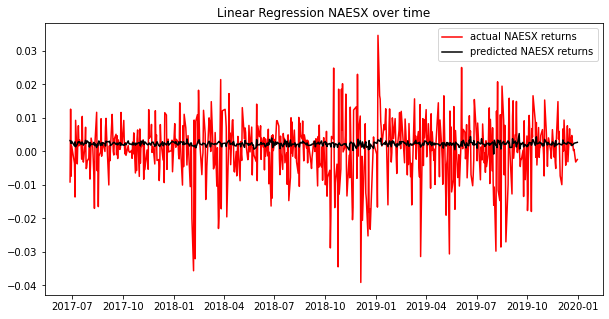

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y1_test.reshape(len(y1_test))), 'r', label = 'actual NAESX returns')
plt.plot(x2, lr_y1_pred, 'k', label = 'predicted NAESX returns')
plt.title('Linear Regression NAESX over time')
plt.legend()
plt.show()

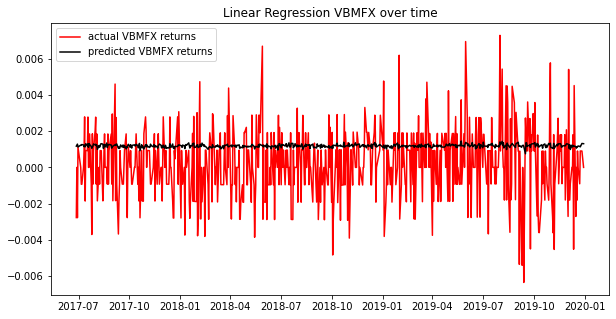

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y2_test.reshape(len(y2_test))), 'r', label = 'actual VBMFX returns')
plt.plot(x2, lr_y2_pred, 'k', label = 'predicted VBMFX returns')
plt.title('Linear Regression VBMFX over time')
plt.legend()
plt.show()

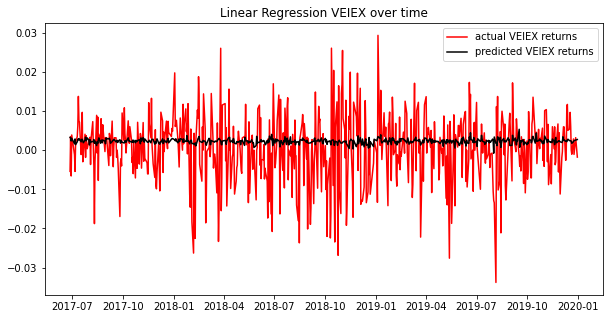

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y3_test.reshape(len(y3_test))), 'r', label = 'actual VEIEX returns')
plt.plot(x2, lr_y3_pred, 'k', label = 'predicted VEIEX returns')
plt.title('Linear Regression VEIEX over time')
plt.legend()
plt.show()

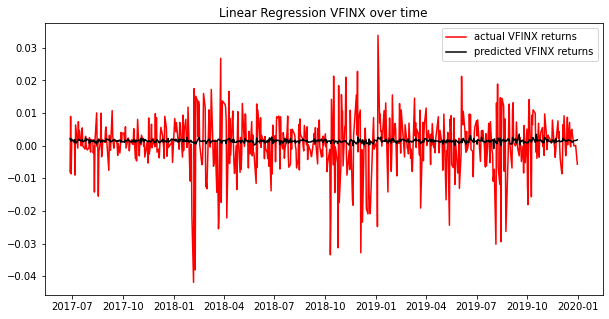

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y4_test.reshape(len(y4_test))), 'r', label = 'actual VFINX returns')
plt.plot(x2, lr_y4_pred, 'k', label = 'predicted VFINX returns')
plt.title('Linear Regression VFINX over time')
plt.legend()
plt.show()

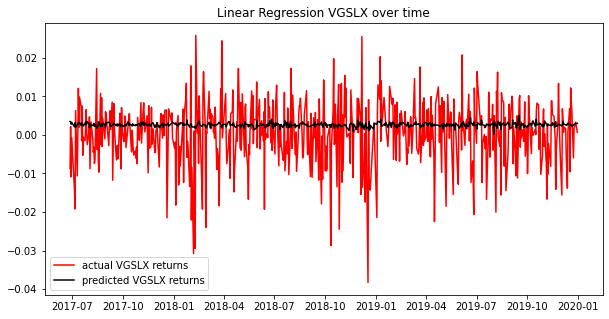

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y5_test.reshape(len(y5_test))), 'r', label = 'actual VGSLX returns')
plt.plot(x2, lr_y5_pred, 'k', label = 'predicted VGSLX returns')
plt.title('Linear Regression VGSLX over time')
plt.legend()
plt.show()

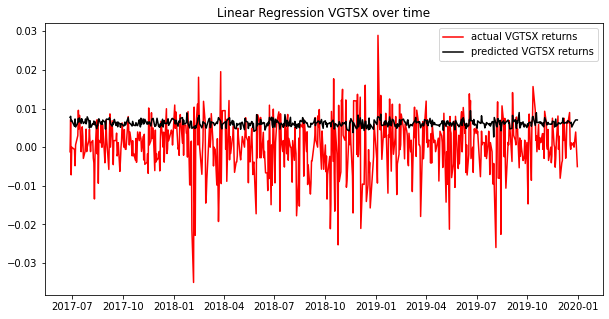

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y6_test.reshape(len(y6_test))), 'r', label = 'actual VGTSX returns')
plt.plot(x2, lr_y6_pred, 'k', label = 'predicted VGTSX returns')
plt.title('Linear Regression VGTSX over time')
plt.legend()
plt.show()

K Nearest Neighbors

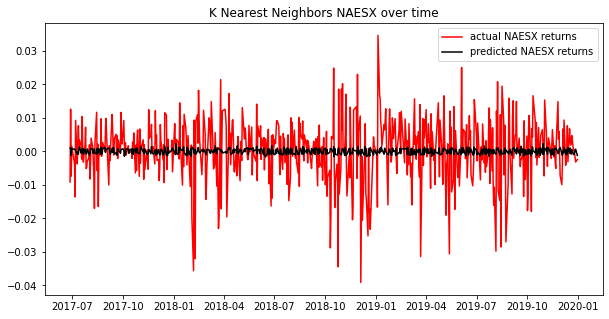

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y1_test.reshape(len(y1_test))), 'r', label = 'actual NAESX returns')
plt.plot(x2, knnp_y1_pred, 'k', label = 'predicted NAESX returns')
plt.title('K Nearest Neighbors NAESX over time')
plt.legend()
plt.show()

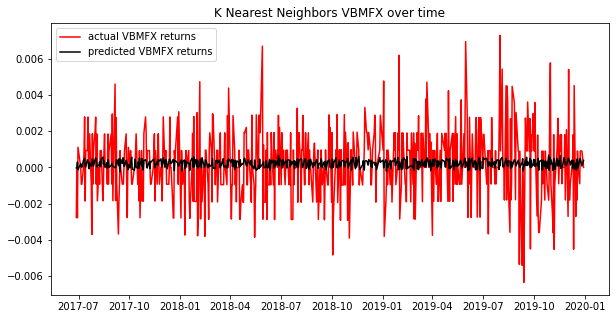

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y2_test.reshape(len(y2_test))), 'r', label = 'actual VBMFX returns')
plt.plot(x2, knnp_y2_pred, 'k', label = 'predicted VBMFX returns')
plt.title('K Nearest Neighbors VBMFX over time')
plt.legend()
plt.show()

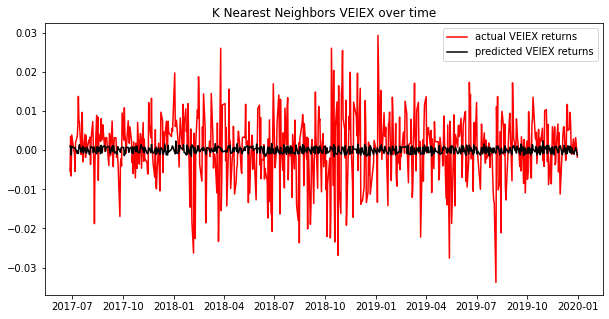

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y3_test.reshape(len(y3_test))), 'r', label = 'actual VEIEX returns')
plt.plot(x2, knnp_y3_pred, 'k', label = 'predicted VEIEX returns')
plt.title('K Nearest Neighbors VEIEX over time')
plt.legend()
plt.show()

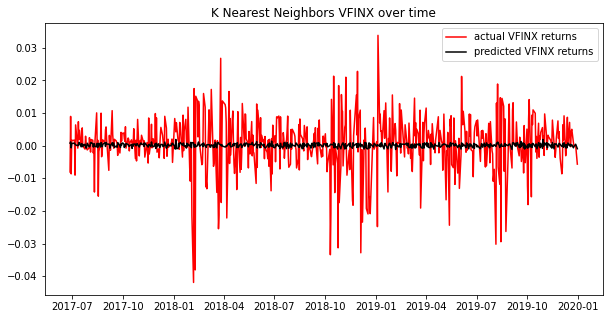

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y4_test.reshape(len(y4_test))), 'r', label = 'actual VFINX returns')
plt.plot(x2, knnp_y4_pred, 'k', label = 'predicted VFINX returns')
plt.title('K Nearest Neighbors VFINX over time')
plt.legend()
plt.show()

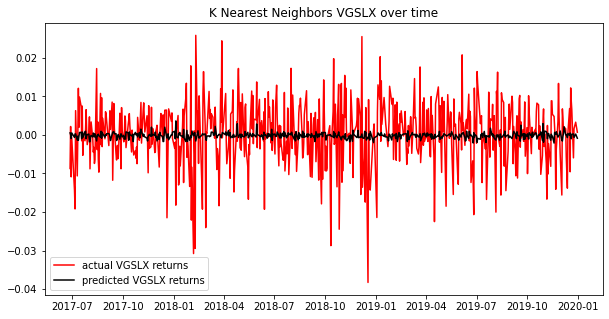

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y5_test.reshape(len(y5_test))), 'r', label = 'actual VGSLX returns')
plt.plot(x2, knnp_y5_pred, 'k', label = 'predicted VGSLX returns')
plt.title('K Nearest Neighbors VGSLX over time')
plt.legend()
plt.show()

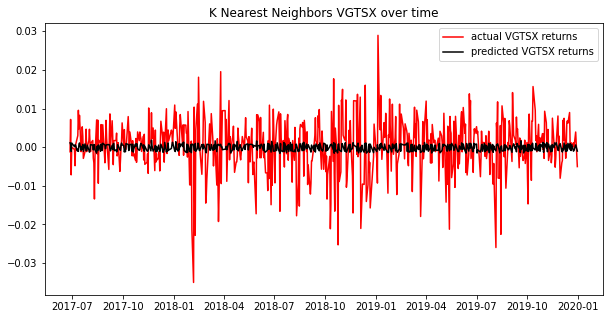

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y6_test.reshape(len(y6_test))), 'r', label = 'actual VGTSX returns')
plt.plot(x2, knnp_y6_pred, 'k', label = 'predicted VGTSX returns')
plt.title('K Nearest Neighbors VGTSX over time')
plt.legend()
plt.show()

LSTM

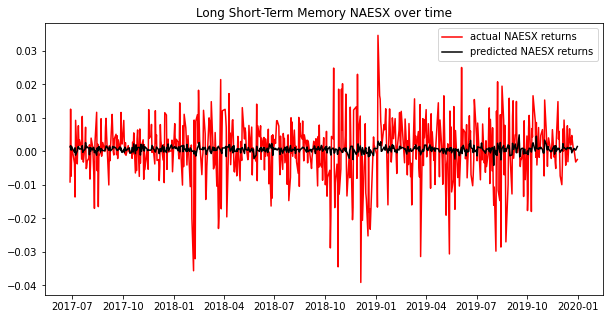

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y1_test.reshape(len(y1_test))), 'r', label = 'actual NAESX returns')
plt.plot(x2, lstm_y1_pred, 'k', label = 'predicted NAESX returns')
plt.title('Long Short-Term Memory NAESX over time')
plt.legend()
plt.show()

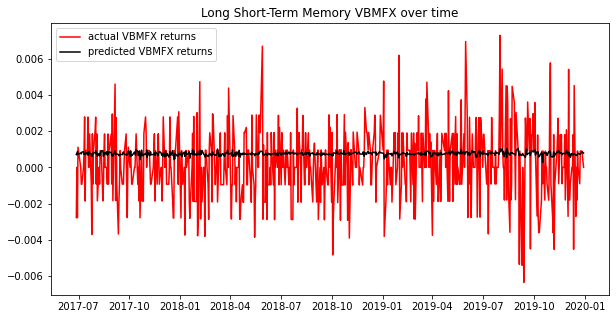

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y2_test.reshape(len(y2_test))), 'r', label = 'actual VBMFX returns')
plt.plot(x2, lstm_y2_pred, 'k', label = 'predicted VBMFX returns')
plt.title('Long Short-Term Memory VBMFX over time')
plt.legend()
plt.show()

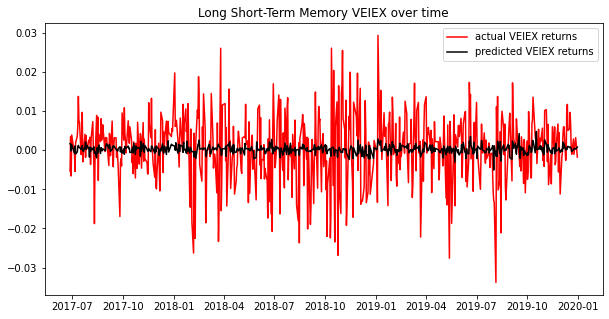

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y3_test.reshape(len(y3_test))), 'r', label = 'actual VEIEX returns')
plt.plot(x2, lstm_y3_pred, 'k', label = 'predicted VEIEX returns')
plt.title('Long Short-Term Memory VEIEX over time')
plt.legend()
plt.show()

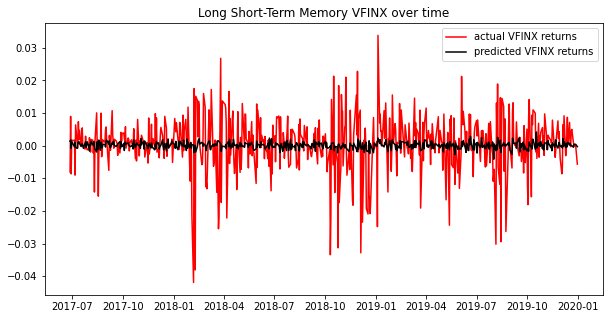

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y4_test.reshape(len(y4_test))), 'r', label = 'actual VFINX returns')
plt.plot(x2, lstm_y4_pred, 'k', label = 'predicted VFINX returns')
plt.title('Long Short-Term Memory VFINX over time')
plt.legend()
plt.show()

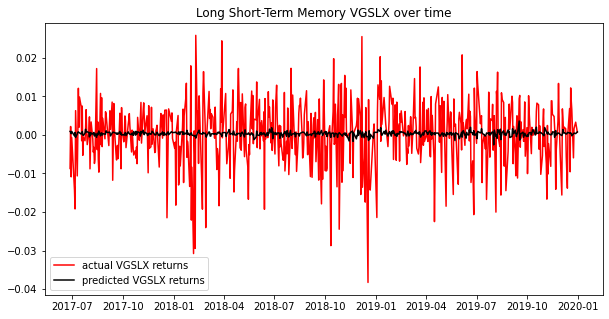

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y5_test.reshape(len(y5_test))), 'r', label = 'actual VGSLX returns')
plt.plot(x2, lstm_y5_pred, 'k', label = 'predicted VGSLX returns')
plt.title('Long Short-Term Memory VGSLX over time')
plt.legend()
plt.show()

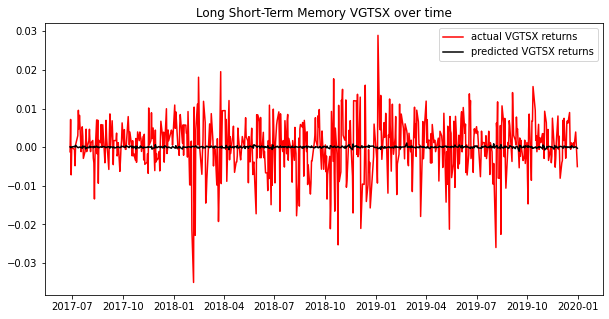

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y6_test.reshape(len(y6_test))), 'r', label = 'actual VGTSX returns')
plt.plot(x2, lstm_y6_pred, 'k', label = 'predicted VGTSX returns')
plt.title('Long Short-Term Memory VGTSX over time')
plt.legend()
plt.show()

MLP

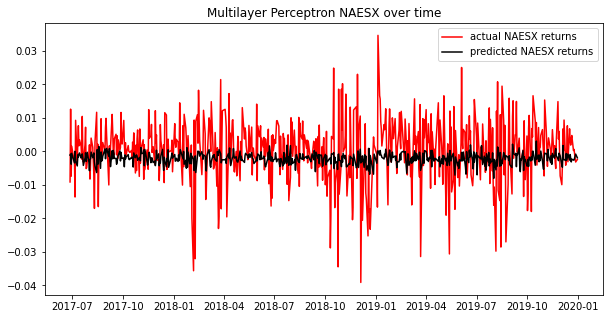

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y1_test.reshape(len(y1_test))), 'r', label = 'actual NAESX returns')
plt.plot(x2, mlp_y1_pred, 'k', label = 'predicted NAESX returns')
plt.title('Multilayer Perceptron NAESX over time')
plt.legend()
plt.show()

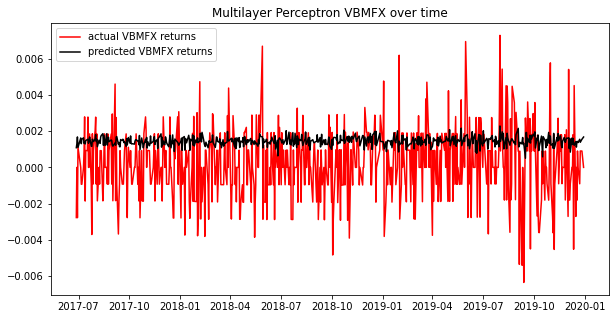

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y2_test.reshape(len(y2_test))), 'r', label = 'actual VBMFX returns')
plt.plot(x2, mlp_y2_pred, 'k', label = 'predicted VBMFX returns')
plt.title('Multilayer Perceptron VBMFX over time')
plt.legend()
plt.show()

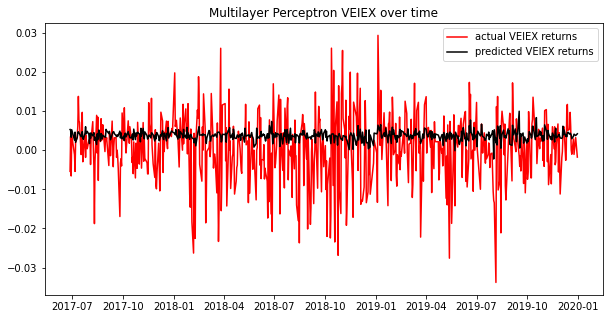

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y3_test.reshape(len(y3_test))), 'r', label = 'actual VEIEX returns')
plt.plot(x2, mlp_y3_pred, 'k', label = 'predicted VEIEX returns')
plt.title('Multilayer Perceptron VEIEX over time')
plt.legend()
plt.show()

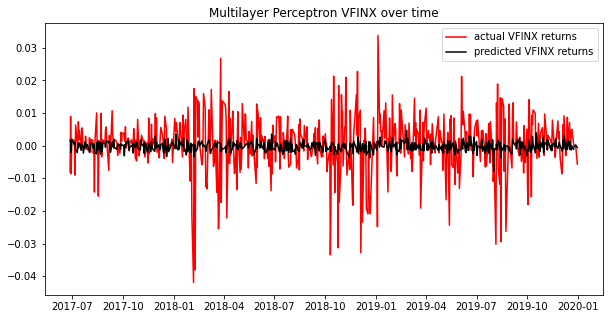

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y4_test.reshape(len(y4_test))), 'r', label = 'actual VFINX returns')
plt.plot(x2, mlp_y4_pred, 'k', label = 'predicted VFINX returns')
plt.title('Multilayer Perceptron VFINX over time')
plt.legend()
plt.show()

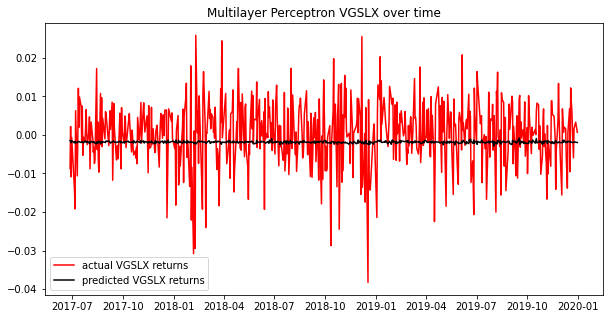

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y5_test.reshape(len(y5_test))), 'r', label = 'actual VGSLX returns')
plt.plot(x2, mlp_y5_pred, 'k', label = 'predicted VGSLX returns')
plt.title('Multilayer Perceptron VGSLX over time')
plt.legend()
plt.show()

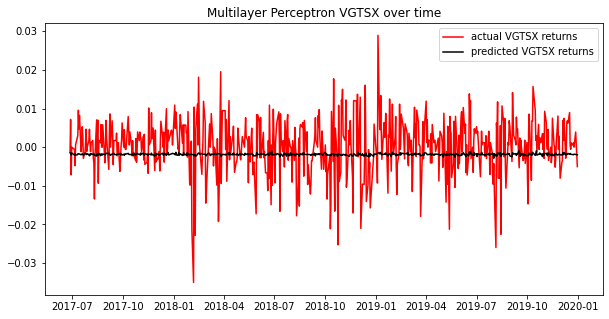

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(x2, pd.Series(y6_test.reshape(len(y6_test))), 'r', label = 'actual VGTSX returns')
plt.plot(x2, mlp_y6_pred, 'k', label = 'predicted VGTSX returns')
plt.title('Multilayer Perceptron VGTSX over time')
plt.legend()
plt.show()